# Data analysis

## Setup

In [1]:
# Load packages
library(readxl)
library(dplyr)
library(ggplot2)
library(stats)
library(stargazer)
library(purrr)
library(stringr)
library(tidyverse)
library(lubridate)
library(lessR)
library(fixest)
library(sandwich)
library(lmtest)
library(car)
library(effsize)


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'dplyr'"

Attachement du package : 'dplyr'


Les objets suivants sont masqu'es depuis 'package:stats':

    filter, lag


Les objets suivants sont masqu'es depuis 'package:base':

    intersect, setdiff, setequal, union


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'stargazer'"

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'purrr'"
Warning message in sprintf(gettext(fmt, domain = domain), ..

In [ ]:
# Import the data
# Set the base directory path
base_directory <- "/Users/julienmbarki/Documents/Doctorat/Publications/Article 2/Data/Code/data_management/" #nolint 

# Create a list of file names
file_names <- c(
    "editorial_playlists_23-24_final.csv",
    "editorial_playlists_22-23_final.csv",
    "editorial_playlists_21-22_final.csv",
    "major_playlists_23-24_final.csv",
    "major_playlists_22-23_final.csv",
    "major_playlists_21-22_final.csv"
)

# Modify the data frame
df_list <- list()

for (i in seq_along(file_names)) {
    file_name <- file_names[i]

    full_path <- file.path(base_directory, file_name)
    df <- read_csv(full_path)

    # Append the data frame to the list
    df_list[[i]] <- df
}

# Combine all data frames
df <- Reduce(function(x, y) merge(x, y, all = TRUE), df_list)

# Export to Excel
write.csv(df, "df_final.csv")


In [ ]:
# Import the data
# Set the base directory path
base_directory <- "/Users/julienmbarki/Documents/Doctorat/Publications/Article 2/Data/Code/data_management/" #nolint 

# Create a list of file names
file_names <- c(
    "charts_playlists_23-24_final.csv",
    "charts_playlists_22-23_final.csv",
    "charts_playlists_21-22_final.csv"
)

# Modify the data frame
df_list <- list()

for (i in seq_along(file_names)) {
    file_name <- file_names[i]

    full_path <- file.path(base_directory, file_name)
    df <- read_csv(full_path)

    # Append the data frame to the list
    df_list[[i]] <- df
}

# Combine all data frames
df <- Reduce(function(x, y) merge(x, y, all = TRUE), df_list)

# Export to Excel
write.csv(df, "charts_final.csv")


## Data management

In [2]:
# Load data
df <- read.csv("df_final_ter.csv")
df_charts <- read.csv("charts_final_bis.csv")

df_combined <- bind_rows(df, df_charts)


### Main measure

In [3]:
# Extract numeric values
df$diversity_clean <- as.numeric(gsub("[^[:digit:].-]", "", df$stirling_index))
df$diversity_clean

df$diversity_clean_2 <- as.numeric(
    gsub("[^[:digit:].-]", "", df$stirling_index_2)
)
df$diversity_clean_2

# Scale values
df$diversity_norm <- rescale(diversity_clean, df, kind = "z")
df$diversity_norm

df$diversity_norm_2 <- rescale(diversity_clean_2, df, kind = "z")
df$diversity_norm_2

# Log values
df$diversity_log <- log(df$diversity_clean + 1)
df$diversity_log

df$diversity_log_2 <- log(df$diversity_clean_2 + 1)
df$diversity_log_2


[1] 0.19848049 0.13040538 0.12884873 0.13123587 0.12989972 0.13268050
    [7] 0.19362288 0.12828400 0.17319370 0.18876889 0.12813593 0.18609467
   [13] 0.16855395 0.16855395 0.12376825 0.12021549 0.17248166 0.12785125
   [19] 0.17276894 0.20207961 0.12865793 0.17405553 0.20569862 0.12566017
   [25] 0.20217412 0.20020806 0.16477364 0.19618565 0.16788963 0.11840328
   [31] 0.11686437 0.11748424 0.11948879 0.11927842 0.11778772 0.19464224
   [37] 0.11841120 0.21537275 0.21731450 0.16925459 0.12126733 0.19690439
   [43] 0.16778209 0.19699168 0.12047536 0.19680816 0.16701881 0.12006977
   [49] 0.19587647 0.19643046 0.12120425 0.11618457 0.16705918 0.16571709
   [55] 0.16567837 0.11787524 0.11856937 0.12081010 0.12242660 0.19205985
   [61] 0.19209101 0.18760387 0.12513437 0.12357245 0.20137373 0.20137373
   [67] 0.12325000 0.21852835 0.11947917 0.17719585 0.17880778 0.17691701
   [73] 0.11857209 0.11840250 0.17948534 0.11427354 0.11579578 0.12030721
   [79] 0.12193030 0.20932676 0.18227092 0.11912639 0.12173096 0.11999744
   [85] 0.11874445 0.11566217 0.14389715 0.14796773 0.14642694 0.11025918
   [91] 0.16710039 0.09112262 0.15311525 0.20979917 0.14910311 0.14614345
   [97] 0.14930496 0.10360883 0.18532603 0.14907718 0.14869513 0.09989984
  [103] 0.20171548 0.14936011 0.12197256 0.12060846 0.12319351 0.12538606
  [109] 0.14139733 0.10045163 0.09865746 0.16846591 0.11533955 0.16600071
  [115] 0.17000502 0.16739803 0.09767080 0.10356547 0.10356547 0.09840500
  [121] 0.09657663 0.10366772 0.11210481 0.10681009 0.10606648 0.15268424
  [127] 0.10404657 0.16090380 0.15829443 0.20851001 0.15830316 0.18588735
  [133] 0.10449157 0.10691505 0.09863520 0.15680161 0.09988447 0.15284861
  [139] 0.10044521 0.09938378 0.09954848 0.21229732 0.12429388 0.17965186
  [145] 0.21065479 0.12007142 0.17779838 0.12299726 0.21121075 0.12084154
  [151] 0.12084154 0.12084154 0.18148315 0.12313757 0.10800478 0.16322802
  [157] 0.11432391 0.23652525 0.20011100 0.13403447 0.13270879 0.13270879
  [163] 0.13270879 0.13270879 0.13270879 0.13270879 0.13270879 0.13183418
  [169] 0.19959337 0.19959337 0.23418950 0.13215914 0.13215914 0.13215914
  [175] 0.13212751 0.13212751 0.13212751 0.13212751 0.23335640 0.23335640
  [181] 0.23335640 0.19729345 0.23335640 0.13219423 0.13129869 0.13129869
  [187] 0.19727260 0.19727260 0.13015397 0.23304483 0.13015397 0.13015397
  [193] 0.13015397 0.13015397 0.12952715 0.13058719 0.13058719 0.13058719
  [199] 0.13058719 0.13058719 0.13058719 0.13058719 0.13058719 0.13058719
  [205] 0.13058719 0.13058719 0.13058719 0.13058719 0.13058719 0.13058719
  [211] 0.19621875 0.13158470 0.13158470 0.13158470 0.19494718 0.13158470
  [217] 0.13158470 0.13158470 0.19494718 0.19494718 0.13158470 0.23206372
  [223] 0.23206372 0.23206372 0.19413049 0.19413049 0.19413049 0.19413049
  [229] 0.13051464 0.19148864 0.19235539 0.19235539 0.19235539 0.19235539
  [235] 0.13094514 0.19019841 0.19019841 0.19019841 0.19019841 0.19019841
  [241] 0.19019841 0.19019841 0.19019841 0.19019841 0.19019841 0.19019841
  [247] 0.19019841 0.22553886 0.22553886 0.22553886 0.22553886 0.22553886
  [253] 0.22553886 0.22553886 0.22553886 0.13000213 0.22553886 0.22553886
  [259] 0.22553886 0.22553886 0.19032114 0.19032114 0.19032114 0.19032114
  [265] 0.19032114 0.19032114 0.22594329 0.22594329 0.13239957 0.13239957
  [271] 0.22152203 0.22152203 0.22152203 0.22152203 0.13374311 0.22152203
  [277] 0.22152203 0.19668445 0.19668445 0.19668445 0.13377759 0.19668445
  [283] 0.13377759 0.19668445 0.13377759 0.19668445 0.19668445 0.13377759
  [289] 0.19668445 0.13348547 0.13348547 0.13348547 0.19657123 0.13441444
  [295] 0.19657123 0.19657123 0.19657123 0.19657123 0.13508509 0.19505635
  [301] 0.19505635 0.19505635 0.13405129 0.19505635 0.19505635 0.19505635
  [307] 0.19505635 0.19505635 0.19505635 0.19505635 0.19505635 0.19505635
  [313] 0.19471437 0.19471437 0.16828362 0.11059028 0.16764267 0.11184084
  [319] 0.11139006 0.16558086 0.16537554 0.11359176 0.11359176 0.11291256
  [325] 

[1] 0.29769668 0.29858228 0.28702486 0.29649178 0.27389869 0.27482830
    [7] 0.26252387 0.26835133 0.26163608 0.27849354 0.28212711 0.28008043
   [13] 0.24231309 0.24231309 0.25788165 0.25685195 0.24029423 0.20078097
   [19] 0.24225742 0.26534391 0.23711885 0.26606463 0.24604774 0.27142186
   [25] 0.26022261 0.23743607 0.25465584 0.25196922 0.24561343 0.24629678
   [31] 0.23674970 0.24355798 0.22602079 0.25667507 0.25684153 0.21393273
   [37] 0.25601614 0.21537275 0.24212873 0.24285984 0.21563664 0.24897212
   [43] 0.21626632 0.26077279 0.22935482 0.25462110 0.25462110 0.25465992
   [49] 0.22961358 0.23172703 0.25726969 0.26479487 0.25208084 0.21736282
   [55] 0.25352268 0.21820850 0.25204488 0.24807427 0.26597374 0.28613677
   [61] 0.27110787 0.25164245 0.28088822 0.26711069 0.26883871 0.26883871
   [67] 0.24697266 0.26135592 0.27070385 0.24979433 0.27567460 0.26861774
   [73] 0.26771973 0.27180939 0.26483224 0.26220236 0.26333942 0.25956174
   [79] 0.26763595 0.28041686 0.28125308 0.27600914 0.23292671 0.28352157
   [85] 0.28216584 0.26265132 0.25175034 0.25174513 0.24182533 0.24180345
   [91] 0.26975585 0.25172797 0.23585006 0.25685482 0.23249024 0.23166335
   [97] 0.24203898 0.22231236 0.25470268 0.25470268 0.25168444 0.21628264
  [103] 0.25014944 0.23792796 0.26664712 0.25273484 0.22480782 0.27167381
  [109] 0.24859443 0.23751046 0.22718307 0.27207590 0.26234346 0.27240351
  [115] 0.27600857 0.22650435 0.26687852 0.26317201 0.24296281 0.27297801
  [121] 0.25690593 0.24218598 0.27073193 0.23276778 0.24212009 0.24732239
  [127] 0.23898102 0.23970377 0.20938908 0.23192950 0.23612156 0.18588735
  [133] 0.22015857 0.23465665 0.22175856 0.24846077 0.24116246 0.15284861
  [139] 0.22694856 0.23259023 0.21185696 0.27284001 0.25660805 0.26646871
  [145] 0.26648587 0.27128181 0.27702244 0.26453674 0.21121075 0.26502116
  [151] 0.28029271 0.26502116 0.28218737 0.29244661 0.24056785 0.28175076
  [157] 0.28010903 0.30771922 0.27503147 0.29226258 0.25743416 0.13270879
  [163] 0.13270879 0.13270879 0.25743416 0.25743416 0.25743416 0.29956627
  [169] 0.29682713 0.30579038 0.30579038 0.30579038 0.27548422 0.29682713
  [175] 0.29268270 0.29268270 0.29268270 0.29268270 0.26741186 0.26741186
  [181] 0.26741186 0.26741186 0.26741186 0.27175882 0.27226998 0.27226998
  [187] 0.29605169 0.29605169 0.26800111 0.26800111 0.30998139 0.26800111
  [193] 0.26800111 0.26800111 0.29465298 0.28454429 0.28454429 0.28454429
  [199] 0.28454429 0.28454429 0.28454429 0.28454429 0.28454429 0.28454429
  [205] 0.28454429 0.28454429 0.28454429 0.28454429 0.28454429 0.28454429
  [211] 0.29901277 0.29514979 0.29514979 0.29514979 0.29514979 0.29514979
  [217] 0.29514979 0.29514979 0.29514979 0.29514979 0.29514979 0.30752438
  [223] 0.23206372 0.23206372 0.28146104 0.24849470 0.24849470 0.24849470
  [229] 0.28279988 0.28279988 0.29518326 0.29518326 0.29518326 0.29518326
  [235] 0.29518326 0.29959785 0.29959785 0.29959785 0.29959785 0.29959785
  [241] 0.29959785 0.29959785 0.29959785 0.29959785 0.29959785 0.29959785
  [247] 0.29959785 0.22553886 0.22553886 0.22553886 0.22553886 0.22553886
  [253] 0.22553886 0.22553886 0.22553886 0.22553886 0.22553886 0.22553886
  [259] 0.22553886 0.22553886 0.28125782 0.28125782 0.28125782 0.28125782
  [265] 0.28125782 0.28125782 0.28125782 0.28125782 0.24993502 0.24993502
  [271] 0.27318112 0.27318112 0.27318112 0.27318112 0.27318112 0.27318112
  [277] 0.27318112 0.28937838 0.28937838 0.31338382 0.28937838 0.31338382
  [283] 0.28937838 0.31338382 0.28937838 0.28937838 0.28937838 0.31338382
  [289] 0.28937838 0.21965723 0.27537884 0.28982891 0.28197755 0.28197755
  [295] 0.28197755 0.28197755 0.28197755 0.28197755 0.26797849 0.30912803
  [301] 0.26315614 0.30912803 0.26315614 0.30912803 0.26315614 0.26315614
  [307] 0.30912803 0.30912803 0.26315614 0.30912803 0.26315614 0.26315614
  [313] 0.30897444 0.30897444 0.26558641 0.20303520 0.26745662 0.21684479
  [319] 0.26000417 0.23868860 0.25557536 0.25583245 0.25583245 0.23506881
  [325] 

[1]  0.344 -0.942 -0.971 -0.926 -0.951 -0.899  0.252 -0.982 -0.134  0.161
   [11] -0.985  0.110 -0.221 -0.221 -1.067 -1.134 -0.147 -0.990 -0.142  0.412
   [21] -0.975 -0.117  0.480 -1.031  0.414  0.377 -0.293  0.301 -0.234 -1.168
   [31] -1.197 -1.186 -1.148 -1.152 -1.180  0.272 -1.168  0.663  0.700 -0.208
   [41] -1.114  0.314 -0.236  0.316 -1.129  0.312 -0.250 -1.137  0.295  0.305
   [51] -1.116 -1.210 -0.249 -0.275 -0.275 -1.178 -1.165 -1.123 -1.092  0.223
   [61]  0.223  0.139 -1.041 -1.071  0.399  0.399 -1.077  0.723 -1.148 -0.058
   [71] -0.027 -0.063 -1.165 -1.168 -0.015 -1.246 -1.218 -1.132 -1.102  0.549
   [81]  0.038 -1.155 -1.106 -1.138 -1.162 -1.220 -0.687 -0.610 -0.639 -1.322
   [91] -0.249 -1.684 -0.513  0.558 -0.589 -0.644 -0.585 -1.448  0.096 -0.589
  [101] -0.596 -1.518  0.405 -0.584 -1.101 -1.127 -1.078 -1.037 -0.734 -1.507
  [111] -1.541 -0.223 -1.226 -0.269 -0.194 -0.243 -1.560 -1.449 -1.449 -1.546
  [121] -1.581 -1.447 -1.287 -1.387 -1.401 -0.521 -1.440 -0.366 -0.415  0.534
  [131] -0.415  0.106 -1.431 -1.385 -1.542 -0.443 -1.518 -0.518 -1.508 -1.528
  [141] -1.525  0.605 -1.057 -0.012  0.574 -1.137 -0.047 -1.082  0.585 -1.122
  [151] -1.122 -1.122  0.023 -1.079 -1.365 -0.322 -1.245  1.063  0.375 -0.873
  [161] -0.898 -0.898 -0.898 -0.898 -0.898 -0.898 -0.898 -0.915  0.365  0.365
  [171]  1.019 -0.909 -0.909 -0.909 -0.909 -0.909 -0.909 -0.909  1.003  1.003
  [181]  1.003  0.322  1.003 -0.908 -0.925 -0.925  0.321  0.321 -0.946  0.997
  [191] -0.946 -0.946 -0.946 -0.946 -0.958 -0.938 -0.938 -0.938 -0.938 -0.938
  [201] -0.938 -0.938 -0.938 -0.938 -0.938 -0.938 -0.938 -0.938 -0.938 -0.938
  [211]  0.301 -0.919 -0.919 -0.919  0.277 -0.919 -0.919 -0.919  0.277  0.277
  [221] -0.919  0.978  0.978  0.978  0.262  0.262  0.262  0.262 -0.940  0.212
  [231]  0.228  0.228  0.228  0.228 -0.932  0.188  0.188  0.188  0.188  0.188
  [241]  0.188  0.188  0.188  0.188  0.188  0.188  0.188  0.855  0.855  0.855
  [251]  0.855  0.855  0.855  0.855  0.855 -0.949  0.855  0.855  0.855  0.855
  [261]  0.190  0.190  0.190  0.190  0.190  0.190  0.863  0.863 -0.904 -0.904
  [271]  0.779  0.779  0.779  0.779 -0.879  0.779  0.779  0.310  0.310  0.310
  [281] -0.878  0.310 -0.878  0.310 -0.878  0.310  0.310 -0.878  0.310 -0.884
  [291] -0.884 -0.884  0.308 -0.866  0.308  0.308  0.308  0.308 -0.853  0.279
  [301]  0.279  0.279 -0.873  0.279  0.279  0.279  0.279  0.279  0.279  0.279
  [311]  0.279  0.279  0.273  0.273 -0.226 -1.316 -0.238 -1.292 -1.301 -0.277
  [321] -0.281 -1.259 -1.259 -1.272 -1.277 -1.464 -1.513 -1.513 -1.513 -0.637
  [331] -1.547 -0.636 -1.579 -1.381 -1.381 -1.407 -0.384 -1.380 -0.371 -1.379
  [341] -0.396 -0.391  1.089 -1.463  0.137 -1.467 -1.514 -1.374 -0.251 -1.331
  [351] -0.300 -0.300 -1.341 -1.341 -1.478 -1.478 -1.478 -1.478 -1.478 -1.478
  [361] -1.478 -1.478 -1.583 -1.599 -0.404 -1.471 -0.447 -0.468 -0.429 -1.397
  [371] -1.411 -0.452 -0.415 -1.387 -1.375 -1.382 -0.420 -0.448 -0.435 -0.435
  [381] -0.435 -1.334 -1.358 -1.359 -0.450 -0.450 -0.473 -0.527 -0.498 -0.457
  [391] -0.463  0.041 -0.523 -0.324 -1.389 -1.368 -1.382 -1.357 -1.288 -1.276
  [401] -1.233 -1.325 -1.323 -0.295 -1.319 -1.288 -1.515 -1.518 -1.517 -1.560
  [411] -0.314 -1.367 -1.405 -1.405 -1.405 -0.315 -1.337 -1.320 -1.358 -0.293
  [421] -0.315 -0.315 -1.356 -1.363 -1.402 -1.313 -1.233 -1.181 -0.344 -1.187
  [431] -1.133 -1.176 -1.176 -0.292 -1.253 -1.214 -0.223 -0.243 -1.317 -1.402
  [441] -1.487 -1.487 -1.723 -1.801 -0.515 -0.537 -1.493 -1.493  0.083 -0.186
  [451] -1.208 -0.149 -0.171 -0.207 -1.262 -1.278 -1.182 -1.156 -1.171 -1.202
  [461] -1.177 -0.306 -0.326 -0.313 -0.313 -0.313 -0.313 -0.290 -0.303 -0.258
  [471] -0.247 -1.177  0.328 -0.134  0.328  0.328 -0.134  0.328  0.328 -0.134
  [481] -0.134  0.328  0.328 -0.134 -0.134 -0.134 -0.134 -0.134 -1.167 -1.167
  [491] -1.167 -1.167 -1.167 -1.167 -1.167 -0.142 -1.167 -1.167 -1.167 -1.167
  [501] -1.167  0.311  0.311  0.311  0.311 -1.181  0.311  0.311 -1.181  0.311
  [511]  0.311  0.311  0.3

[1] -0.067 -0.048 -0.288 -0.092 -0.559 -0.540 -0.794 -0.674 -0.813 -0.464
   [11] -0.389 -0.431 -1.213 -1.213 -0.890 -0.912 -1.254 -2.072 -1.214 -0.736
   [21] -1.320 -0.721 -1.135 -0.610 -0.842 -1.313 -0.957 -1.013 -1.144 -1.130
   [31] -1.328 -1.187 -1.550 -0.915 -0.912 -1.800 -0.929 -1.770 -1.216 -1.201
   [41] -1.764 -1.075 -1.751 -0.831 -1.481 -0.958 -0.958 -0.957 -1.475 -1.431
   [51] -0.903 -0.747 -1.010 -1.729 -0.981 -1.711 -1.011 -1.093 -0.723 -0.306
   [61] -0.617 -1.020 -0.415 -0.700 -0.664 -0.664 -1.116 -0.819 -0.625 -1.058
   [71] -0.522 -0.668 -0.687 -0.602 -0.747 -0.801 -0.778 -0.856 -0.689 -0.424
   [81] -0.407 -0.515 -1.407 -0.360 -0.388 -0.792 -1.017 -1.017 -1.223 -1.223
   [91] -0.645 -1.018 -1.346 -0.912 -1.416 -1.433 -1.218 -1.626 -0.956 -0.956
  [101] -1.019 -1.751 -1.050 -1.303 -0.709 -0.997 -1.575 -0.605 -1.083 -1.312
  [111] -1.525 -0.597 -0.798 -0.590 -0.515 -1.540 -0.704 -0.781 -1.199 -0.578
  [121] -0.911 -1.215 -0.625 -1.410 -1.216 -1.109 -1.281 -1.266 -1.894 -1.427
  [131] -1.341 -2.380 -1.671 -1.371 -1.638 -1.085 -1.236 -3.063 -1.530 -1.414
  [141] -1.843 -0.581 -0.917 -0.713 -0.712 -0.613 -0.494 -0.753 -1.856 -0.743
  [151] -0.427 -0.743 -0.388 -0.175 -1.249 -0.397 -0.431  0.141 -0.536 -0.179
  [161] -0.900 -3.480 -3.480 -3.480 -0.900 -0.900 -0.900 -0.028 -0.085  0.101
  [171]  0.101  0.101 -0.526 -0.085 -0.171 -0.171 -0.171 -0.171 -0.693 -0.693
  [181] -0.693 -0.693 -0.693 -0.603 -0.593 -0.593 -0.101 -0.101 -0.681 -0.681
  [191]  0.187 -0.681 -0.681 -0.681 -0.130 -0.339 -0.339 -0.339 -0.339 -0.339
  [201] -0.339 -0.339 -0.339 -0.339 -0.339 -0.339 -0.339 -0.339 -0.339 -0.339
  [211] -0.040 -0.120 -0.120 -0.120 -0.120 -0.120 -0.120 -0.120 -0.120 -0.120
  [221] -0.120  0.136 -1.425 -1.425 -0.403 -1.085 -1.085 -1.085 -0.375 -0.375
  [231] -0.119 -0.119 -0.119 -0.119 -0.119 -0.027 -0.027 -0.027 -0.027 -0.027
  [241] -0.027 -0.027 -0.027 -0.027 -0.027 -0.027 -0.027 -1.560 -1.560 -1.560
  [251] -1.560 -1.560 -1.560 -1.560 -1.560 -1.560 -1.560 -1.560 -1.560 -1.560
  [261] -0.407 -0.407 -0.407 -0.407 -0.407 -0.407 -0.407 -0.407 -1.055 -1.055
  [271] -0.574 -0.574 -0.574 -0.574 -0.574 -0.574 -0.574 -0.239 -0.239  0.258
  [281] -0.239  0.258 -0.239  0.258 -0.239 -0.239 -0.239  0.258 -0.239 -1.681
  [291] -0.528 -0.230 -0.392 -0.392 -0.392 -0.392 -0.392 -0.392 -0.682  0.170
  [301] -0.781  0.170 -0.781  0.170 -0.781 -0.781  0.170  0.170 -0.781  0.170
  [311] -0.781 -0.781  0.166  0.166 -0.731 -2.025 -0.692 -1.739 -0.847 -1.287
  [321] -0.938 -0.933 -0.933 -1.362 -0.849 -1.041 -2.415 -1.252 -1.252 -1.508
  [331] -1.259 -1.312 -1.142 -1.821 -1.309 -0.805 -1.446 -1.446 -1.257 -0.792
  [341] -1.295 -1.080  0.272  0.050 -0.094 -0.195 -0.750 -0.348 -2.771 -0.503
  [351] -0.477 -0.477 -0.477 -0.477 -0.560 -0.684 -0.560 -0.560 -0.560 -0.628
  [361] -0.628 -0.628 -0.891 -1.346 -1.324 -0.880 -1.039 -1.372 -0.803 -1.203
  [371] -1.167 -0.909 -0.939 -0.926 -1.605 -0.932 -1.196 -1.108 -0.950 -0.950
  [381] -0.950 -1.052 -1.089 -1.147 -1.229 -1.229 -1.635 -1.067 -1.268 -1.244
  [391] -1.569 -1.423 -1.306 -0.964 -0.905 -0.781 -1.187 -0.847 -0.937 -0.749
  [401] -0.926 -0.620 -0.574 -0.808 -0.951 -0.668 -1.017 -0.597 -1.285 -1.023
  [411] -0.685 -0.685 -0.596 -0.596 -0.596 -0.705 -0.651 -0.896 -1.269 -0.860
  [421] -1.124 -1.124 -1.196 -1.155 -4.032 -1.319 -0.736 -0.622 -0.652 -0.743
  [431] -0.689 -1.137 -1.584 -1.270 -1.042 -1.227 -2.055 -0.827 -1.423 -0.991
  [441] -1.066 -0.811 -0.978 -0.888 -1.283 -1.041 -1.845 -1.487 -1.851 -0.737
  [451] -1.542 -0.598 -1.525 -0.518 -0.757 -0.648 -0.598 -0.537 -0.470 -0.722
  [461] -1.521 -1.534 -0.517 -0.523 -0.523 -0.523 -0.523 -0.721 -0.868 -1.600
  [471] -0.489 -0.860 -0.833 -0.833 -0.833 -0.833 -0.961 -0.833 -0.833 -0.833
  [481] -0.833 -0.833 -0.833 -0.833 -0.833 -1.233 -0.833 -0.833 -1.213 -1.213
  [491] -1.213 -1.213 -1.213 -1.213 -1.213 -1.213 -1.213 -1.213 -1.213 -1.213
  [501] -1.213 -1.083 -1.083 -1.083 -1.083 -0.939 -0.939 -0.939 -1.083 -0.939
  [511] -1.083 -0.939 -1.0

[1] 0.18105450 0.12257631 0.12119829 0.12331073 0.12212889 0.12458695
    [7] 0.17699312 0.12069789 0.15972969 0.17291823 0.12056665 0.17066612
   [13] 0.15576704 0.15576704 0.11668755 0.11352107 0.15912258 0.12031427
   [19] 0.15936757 0.18405307 0.12102925 0.16046402 0.18705917 0.11836968
   [25] 0.18413168 0.18249493 0.15252677 0.17913787 0.15519839 0.11190203
   [31] 0.11052509 0.11107994 0.11287214 0.11268421 0.11135148 0.17784676
   [37] 0.11190911 0.19505082 0.19664720 0.15636644 0.11445959 0.17973855
   [43] 0.15510630 0.17981148 0.11375302 0.17965815 0.15445247 0.11339098
   [49] 0.17887936 0.17934251 0.11440333 0.10991624 0.15448706 0.15333643
   [55] 0.15330321 0.11142978 0.11205052 0.11405173 0.11549295 0.17568278
   [61] 0.17570892 0.17193772 0.11790247 0.11651330 0.18346568 0.18346568
   [67] 0.11622627 0.19764386 0.11286355 0.16313521 0.16450357 0.16289832
   [73] 0.11205295 0.11190133 0.16507819 0.10820266 0.10956785 0.11360294
   [79] 0.11505068 0.19006381 0.16743710 0.11254837 0.11487299 0.11332640
   [85] 0.11220703 0.10944810 0.13444099 0.13799319 0.13665010 0.10459348
   [91] 0.15452237 0.08720709 0.14246719 0.19045437 0.13898173 0.13640278
   [97] 0.13915738 0.09858556 0.17001787 0.13895917 0.13862663 0.09521912
  [103] 0.18375010 0.13920536 0.11508835 0.11387181 0.11617598 0.11812614
  [109] 0.13225324 0.09572067 0.09408894 0.15569170 0.10915889 0.15357970
  [115] 0.15700804 0.15477737 0.09319048 0.09854627 0.09854627 0.09385913
  [121] 0.09219317 0.09863892 0.10625444 0.10148209 0.10081001 0.14209334
  [127] 0.09898213 0.14919884 0.14694860 0.18938820 0.14695614 0.17049131
  [133] 0.09938511 0.10157691 0.09406868 0.14565896 0.09520515 0.14223593
  [139] 0.09571483 0.09474982 0.09489962 0.19251717 0.11715518 0.16521936
  [145] 0.19116136 0.11339245 0.16364692 0.11600124 0.19162048 0.11407978
  [151] 0.11407978 0.11407978 0.16677056 0.11612617 0.10256090 0.15119892
  [157] 0.10824786 0.21230523 0.18241405 0.12578160 0.12461192 0.12461192
  [163] 0.12461192 0.12461192 0.12461192 0.12461192 0.12461192 0.12383948
  [169] 0.18198264 0.18198264 0.21041448 0.12412655 0.12412655 0.12412655
  [175] 0.12409861 0.12409861 0.12409861 0.12409861 0.20973923 0.20973923
  [181] 0.20973923 0.18006355 0.20973923 0.12415755 0.12336626 0.12336626
  [187] 0.18004614 0.18004614 0.12235388 0.20948658 0.12235388 0.12235388
  [193] 0.12235388 0.12235388 0.12179909 0.12273713 0.12273713 0.12273713
  [199] 0.12273713 0.12273713 0.12273713 0.12273713 0.12273713 0.12273713
  [205] 0.12273713 0.12273713 0.12273713 0.12273713 0.12273713 0.12273713
  [211] 0.17916554 0.12361904 0.12361904 0.12361904 0.17810198 0.12361904
  [217] 0.12361904 0.12361904 0.17810198 0.17810198 0.12361904 0.20869058
  [223] 0.20869058 0.20869058 0.17741830 0.17741830 0.17741830 0.17741830
  [229] 0.12267296 0.17520348 0.17593067 0.17593067 0.17593067 0.17593067
  [235] 0.12305369 0.17412002 0.17412002 0.17412002 0.17412002 0.17412002
  [241] 0.17412002 0.17412002 0.17412002 0.17412002 0.17412002 0.17412002
  [247] 0.17412002 0.20338063 0.20338063 0.20338063 0.20338063 0.20338063
  [253] 0.20338063 0.20338063 0.20338063 0.12221952 0.20338063 0.20338063
  [259] 0.20338063 0.20338063 0.17422314 0.17422314 0.17422314 0.17422314
  [265] 0.17422314 0.17422314 0.20371058 0.20371058 0.12433889 0.12433889
  [271] 0.20009765 0.20009765 0.20009765 0.20009765 0.12552465 0.20009765
  [277] 0.20009765 0.17955477 0.17955477 0.17955477 0.12555506 0.17955477
  [283] 0.12555506 0.17955477 0.12555506 0.17955477 0.17955477 0.12555506
  [289] 0.17955477 0.12529737 0.12529737 0.12529737 0.17946016 0.12611661
  [295] 0.17946016 0.17946016 0.17946016 0.17946016 0.12670762 0.17819334
  [301] 0.17819334 0.17819334 0.12579643 0.17819334 0.17819334 0.17819334
  [307] 0.17819334 0.17819334 0.17819334 0.17819334 0.17819334 0.17819334
  [313] 0.17790714 0.17790714 0.15553568 0.10489166 0.15498690 0.10601706
  [319] 0.10561154 0.15321956 0.15304339 0.10759061 0.10759061 0.10698051
  [325] 

[1] 0.26059091 0.26127312 0.25233324 0.25966199 0.24208203 0.24281150
    [7] 0.23311279 0.23771789 0.23240935 0.24568246 0.24852050 0.24692291
   [13] 0.21697504 0.21697504 0.22942908 0.22861014 0.21534863 0.18297215
   [19] 0.21693022 0.23534395 0.21278517 0.23591337 0.21997673 0.24013585
   [25] 0.23128838 0.21304155 0.22686130 0.22471769 0.21962812 0.22017658
   [31] 0.21248673 0.21797661 0.20377379 0.22846940 0.22860185 0.19386528
   [37] 0.22794492 0.19505082 0.21682663 0.21741505 0.19526792 0.22232091
   [43] 0.19578577 0.23172486 0.20648950 0.22683361 0.22683361 0.22686456
   [49] 0.20669996 0.20841727 0.22894246 0.23490995 0.22480684 0.19668690
   [55] 0.22595773 0.19738134 0.22477812 0.22160178 0.23584158 0.25164297
   [61] 0.23988886 0.22445665 0.24755376 0.23673926 0.23810208 0.23810208
   [67] 0.22071874 0.23218727 0.23957096 0.22297900 0.24347514 0.23792791
   [73] 0.23721980 0.24044060 0.23493950 0.23285810 0.23375855 0.23076384
   [79] 0.23715371 0.24718570 0.24783857 0.24373735 0.20939078 0.24960753
   [85] 0.24855071 0.23321373 0.22454284 0.22453868 0.21658234 0.21656472
   [91] 0.23882464 0.22452497 0.21175904 0.22861243 0.20903671 0.20836557
   [97] 0.21675437 0.20074444 0.22689864 0.22689864 0.22449020 0.19579919
  [103] 0.22326310 0.21343898 0.23637335 0.22532903 0.20278395 0.24033399
  [109] 0.22201846 0.21310167 0.20472136 0.24065013 0.23296988 0.24090764
  [115] 0.24373690 0.20416813 0.23655602 0.23362603 0.21749789 0.24135905
  [121] 0.22865309 0.21687271 0.23959306 0.20926187 0.21681967 0.22099917
  [127] 0.21428928 0.21487246 0.19011534 0.20858164 0.21197870 0.17049131
  [133] 0.19898083 0.21079292 0.20029126 0.22191141 0.21604841 0.14223593
  [139] 0.20453024 0.20911783 0.19215386 0.24125063 0.22841607 0.23623248
  [145] 0.23624603 0.24002569 0.24453115 0.23470584 0.19162048 0.23508885
  [151] 0.24708873 0.23508885 0.24856750 0.25653702 0.21556922 0.24822692
  [157] 0.24694525 0.26828457 0.24297086 0.25639462 0.22907326 0.12461192
  [163] 0.12461192 0.12461192 0.22907326 0.22907326 0.22907326 0.26203057
  [169] 0.25992061 0.26680851 0.26680851 0.26680851 0.24332589 0.25992061
  [175] 0.25671967 0.25671967 0.25671967 0.25671967 0.23697692 0.23697692
  [181] 0.23697692 0.23697692 0.23697692 0.24040084 0.24080269 0.24080269
  [187] 0.25932248 0.25932248 0.23744173 0.23744173 0.27001293 0.23744173
  [193] 0.23744173 0.23744173 0.25824269 0.25040402 0.25040402 0.25040402
  [199] 0.25040402 0.25040402 0.25040402 0.25040402 0.25040402 0.25040402
  [205] 0.25040402 0.25040402 0.25040402 0.25040402 0.25040402 0.25040402
  [211] 0.26160457 0.25862636 0.25862636 0.25862636 0.25862636 0.25862636
  [217] 0.25862636 0.25862636 0.25862636 0.25862636 0.25862636 0.26813556
  [223] 0.20869058 0.20869058 0.24800086 0.22193859 0.22193859 0.22193859
  [229] 0.24904510 0.24904510 0.25865220 0.25865220 0.25865220 0.25865220
  [235] 0.25865220 0.26205487 0.26205487 0.26205487 0.26205487 0.26205487
  [241] 0.26205487 0.26205487 0.26205487 0.26205487 0.26205487 0.26205487
  [247] 0.26205487 0.20338063 0.20338063 0.20338063 0.20338063 0.20338063
  [253] 0.20338063 0.20338063 0.20338063 0.20338063 0.20338063 0.20338063
  [259] 0.20338063 0.20338063 0.24784227 0.24784227 0.24784227 0.24784227
  [265] 0.24784227 0.24784227 0.24784227 0.24784227 0.22309157 0.22309157
  [271] 0.24151859 0.24151859 0.24151859 0.24151859 0.24151859 0.24151859
  [277] 0.24151859 0.25416023 0.25416023 0.27260688 0.25416023 0.27260688
  [283] 0.25416023 0.27260688 0.25416023 0.25416023 0.25416023 0.27260688
  [289] 0.25416023 0.19856986 0.24324326 0.25450958 0.24840385 0.24840385
  [295] 0.24840385 0.24840385 0.24840385 0.24840385 0.23742389 0.26936129
  [301] 0.23361346 0.26936129 0.23361346 0.26936129 0.23361346 0.23361346
  [307] 0.26936129 0.26936129 0.23361346 0.26936129 0.23361346 0.23361346
  [313] 0.26924396 0.26924396 0.23553558 0.18484770 0.23701223 0.19626127
  [319] 0.23111503 0.21405324 0.22759392 0.22779866 0.22779866 0.21112669
  [325] 

### Secondary measures

In [4]:
# HH-Index
# Scale values
df$hhi_norm <- rescale(hh_index, df, kind = "z")
df$hhi_norm

df$hhi_norm_2 <- rescale(hh_index_2, df, kind = "z")
df$hhi_norm_2


[1] -1.040  0.434  0.439  0.386  0.390  0.404 -0.914  0.481 -1.023 -1.015
   [11]  0.386 -1.006 -1.002 -1.002  0.387  0.474 -0.804  0.405 -0.700 -1.528
   [21]  0.435 -0.714 -1.688  0.399 -1.499 -1.518 -0.660 -1.679 -1.054  0.419
   [31]  0.429  0.437  0.448  0.462  0.494 -1.713  0.515 -2.120 -1.997 -0.946
   [41]  0.429 -1.711 -0.995 -1.745  0.397 -1.735 -0.978  0.389 -1.746 -1.732
   [51]  0.386  0.828 -0.974 -0.744 -0.838  0.567  0.539  0.608  0.589 -1.019
   [61] -1.031 -1.011  0.550  0.611 -1.464 -1.464  0.891 -1.948  0.631 -1.042
   [71] -0.867 -0.871  0.698  0.689 -0.936  0.679  0.710  0.408  0.704 -1.735
   [81] -0.946  1.057  0.848  0.700  0.656  0.608 -0.159 -0.600 -0.669  0.641
   [91] -1.025  1.585 -0.616 -1.924 -0.523 -0.418 -0.523  0.686 -1.613 -0.526
  [101] -0.581  0.867 -1.895 -0.581  0.386  0.468  0.397  0.402 -0.313  0.439
  [111]  0.508 -0.797  0.553 -0.469 -0.766 -0.651  1.233  1.399  1.399  1.468
  [121]  1.964  1.202  0.580  0.849  0.884 -0.880  0.804 -0.702 -0.797 -1.994
  [131] -0.909 -1.487  0.826  0.775  1.066 -0.623  1.164 -0.840  0.911  0.910
  [141]  0.895 -1.617  0.449 -1.028 -1.703  0.441 -0.943  0.410 -1.750  0.435
  [151]  0.435  0.435 -1.023  0.526  1.253 -0.631  0.803 -1.745 -1.043  0.436
  [161]  0.424  0.424  0.424  0.424  0.424  0.424  0.424  0.434 -1.048 -1.048
  [171] -1.748  0.457  0.457  0.457  0.448  0.448  0.448  0.448 -1.754 -1.754
  [181] -1.754 -1.050 -1.754  0.431  0.442  0.442 -1.038 -1.038  0.492 -1.709
  [191]  0.492  0.492  0.492  0.492  0.506  0.487  0.487  0.487  0.487  0.487
  [201]  0.487  0.487  0.487  0.487  0.487  0.487  0.487  0.487  0.487  0.487
  [211] -1.004  0.437  0.437  0.437 -1.001  0.437  0.437  0.437 -1.001 -1.001
  [221]  0.437 -1.709 -1.709 -1.709 -1.027 -1.027 -1.027 -1.027  0.452 -0.975
  [231] -1.016 -1.016 -1.016 -1.016  0.463 -0.964 -0.964 -0.964 -0.964 -0.964
  [241] -0.964 -0.964 -0.964 -0.964 -0.964 -0.964 -0.964 -1.706 -1.706 -1.706
  [251] -1.706 -1.706 -1.706 -1.706 -1.706  0.459 -1.706 -1.706 -1.706 -1.706
  [261] -0.964 -0.964 -0.964 -0.964 -0.964 -0.964 -1.727 -1.727  0.497  0.497
  [271] -1.363 -1.363 -1.363 -1.363  0.466 -1.363 -1.363 -1.020 -1.020 -1.020
  [281]  0.450 -1.020  0.450 -1.020  0.450 -1.020 -1.020  0.450 -1.020  0.437
  [291]  0.437  0.437 -1.005  0.425 -1.005 -1.005 -1.005 -1.005  0.415 -0.995
  [301] -0.995 -0.995  0.395 -0.995 -0.995 -0.995 -0.995 -0.995 -0.995 -0.995
  [311] -0.995 -0.995 -0.993 -0.993 -0.954  0.498 -0.920  0.386  0.389 -0.897
  [321] -0.839  0.395  0.395  0.388  0.386  0.525  0.637  0.637  0.637 -0.725
  [331]  0.554 -0.747  0.627  0.386  0.386  0.394 -1.020  0.389 -1.021  0.388
  [341] -1.014 -1.018 -1.389  1.918 -0.859  1.658  1.709  0.911 -0.877  0.449
  [351] -0.823 -0.823  0.470  0.470  0.970  0.970  0.970  0.970  0.970  0.970
  [361]  0.970  0.970  1.302  1.323 -0.676  0.983 -0.683 -0.712 -0.796  0.429
  [371]  0.443 -0.932 -0.990  0.386  0.386  0.388 -0.958 -0.952 -0.934 -0.934
  [381] -0.934  0.387  0.401  0.404 -0.956 -0.956 -0.898 -0.857 -0.882 -0.901
  [391] -0.861 -1.468 -0.889 -0.979  0.637  0.446  0.521  0.390  0.489  0.431
  [401]  0.501  0.559  0.517 -0.784  0.416  0.408  1.258  1.258  1.202  1.323
  [411] -0.932  0.388  0.641  0.641  0.641 -0.837  0.471  0.422  0.537 -0.640
  [421] -0.871 -0.871  0.482  0.446  0.613  0.426  0.410  0.388 -0.467  0.635
  [431]  0.390  0.388  0.388 -0.689  0.386  0.388 -0.876 -0.862  0.400  0.579
  [441]  0.686  0.686  1.541  1.793 -0.613 -0.630  0.587  0.587 -1.185 -1.048
  [451]  0.394 -1.055 -1.036 -1.034  0.389  0.391  0.402  0.386  0.594  0.586
  [461]  0.541 -0.482 -0.468 -0.468 -0.468 -0.468 -0.468 -0.463 -0.468 -0.633
  [471] -0.601  0.415 -1.520 -0.982 -1.520 -1.520 -0.982 -1.520 -1.520 -0.982
  [481] -0.982 -1.520 -1.520 -0.982 -0.982 -0.982 -0.982 -0.982  0.418  0.418
  [491]  0.418  0.418  0.418  0.418  0.418 -0.927  0.418  0.418  0.418  0.418
  [501]  0.418 -1.483 -1.483 -1.483 -1.483  0.416 -1.483 -1.483  0.416 -1.483
  [511] -1.483 -1.483 -1.4

[1] -0.618 -0.912 -0.808 -0.952 -0.194 -0.260  0.041 -0.850 -0.880 -0.932
   [11] -1.087 -1.114 -0.437 -0.437 -0.926 -0.982 -0.195  1.296 -0.130 -0.983
   [21] -0.150 -1.054 -0.221 -1.108 -0.774 -0.103 -1.003 -0.959 -0.703 -0.663
   [31] -0.474 -0.751  0.010 -1.104 -1.090  0.533 -0.878  0.521 -0.321 -0.473
   [41]  0.750 -0.710  0.729 -1.088 -0.003 -0.807 -0.807 -0.935 -0.002 -0.080
   [51] -0.886 -1.094 -0.630  0.798 -0.655  0.774 -0.665  0.132 -0.550 -1.073
   [61] -0.516  0.081 -1.119 -1.181 -1.173 -1.173 -0.423 -0.924 -1.034 -0.360
   [71] -0.963 -0.851 -0.815 -1.118 -0.908 -1.149 -1.165 -0.906 -0.932 -0.858
   [81] -0.876 -0.668  0.509 -0.909 -1.074 -0.492 -0.602 -1.050 -0.717 -0.201
   [91] -1.026 -0.850 -0.145 -1.020 -0.095 -0.116 -0.562  0.042 -1.103 -1.103
  [101] -0.930  0.277 -1.030 -0.647 -0.606 -0.033  0.870 -1.016 -0.890 -0.526
  [111] -0.157 -1.010 -0.677 -0.748 -0.758  1.030 -0.888 -0.518  0.072 -0.993
  [121] -0.447  0.170 -0.990 -0.363 -0.704 -1.058 -0.327 -0.200  0.894 -0.144
  [131] -0.428  1.710  0.238 -0.123  0.082 -0.706 -0.703  2.925 -0.203 -0.422
  [141]  0.564 -0.778 -0.147 -0.554 -0.546 -0.749 -1.021 -0.531  1.216 -0.555
  [151] -1.083 -0.555 -1.120 -0.935  0.348 -1.026 -0.961 -0.738  0.283 -0.417
  [161]  0.478  5.295  5.295  5.295  0.478  0.478  0.478 -0.631 -0.569 -0.873
  [171] -0.873 -0.873 -0.174 -0.569 -0.180 -0.180 -0.180 -0.180  0.212  0.212
  [181]  0.212  0.212  0.212  0.029 -0.089 -0.089 -0.657 -0.657  0.392  0.392
  [191] -0.895  0.392  0.392  0.392 -0.664 -0.386 -0.386 -0.386 -0.386 -0.386
  [201] -0.386 -0.386 -0.386 -0.386 -0.386 -0.386 -0.386 -0.386 -0.386 -0.386
  [211] -0.564 -0.565 -0.565 -0.565 -0.565 -0.565 -0.565 -0.565 -0.565 -0.565
  [221] -0.565 -0.862  1.292  1.292 -0.444  0.706  0.706  0.706 -0.516 -0.516
  [231] -0.683 -0.683 -0.683 -0.683 -0.683 -0.863 -0.863 -0.863 -0.863 -0.863
  [241] -0.863 -0.863 -0.863 -0.863 -0.863 -0.863 -0.863  1.298  1.298  1.298
  [251]  1.298  1.298  1.298  1.298  1.298  1.298  1.298  1.298  1.298  1.298
  [261] -0.324 -0.324 -0.324 -0.324 -0.324 -0.324 -0.324 -0.324  0.472  0.472
  [271]  0.131  0.131  0.131  0.131  0.131  0.131  0.131 -0.264 -0.264 -1.047
  [281] -0.264 -1.047 -0.264 -1.047 -0.264 -0.264 -0.264 -1.047 -0.264  1.958
  [291]  0.123 -0.452 -0.195 -0.195 -0.195 -0.195 -0.195 -0.195  0.239 -0.995
  [301]  0.349 -0.995  0.349 -0.995  0.349  0.349 -0.995 -0.995  0.349 -0.995
  [311]  0.349  0.349 -1.067 -1.067 -0.761  1.397 -0.825  1.260 -0.668  0.232
  [321] -0.449 -0.633 -0.633  0.266 -0.810 -0.927  1.531 -0.632 -0.632 -0.259
  [331] -0.816 -0.728 -1.033  0.714 -0.214 -1.050  0.140  0.140 -0.277 -0.980
  [341] -0.204 -0.545 -0.533 -1.078 -0.825 -0.872  0.073 -0.820  2.854 -0.545
  [351] -0.965 -0.965 -0.965 -0.965 -0.736 -0.692 -0.736 -0.736 -0.736 -0.915
  [361] -0.915 -0.915 -0.500  0.400  0.319 -0.524 -0.190  0.002 -0.681 -0.348
  [371] -0.215 -0.915 -0.939 -1.064  0.097 -1.181 -0.787 -0.844 -1.092 -1.092
  [381] -1.092 -0.987 -1.195 -1.109 -0.904 -0.904 -0.104 -1.119 -0.756 -0.722
  [391] -0.150 -0.318 -0.692 -0.543 -0.655 -0.749  0.007 -0.624 -0.164 -0.546
  [401] -0.052 -0.957 -0.856 -0.361  0.064 -0.834 -0.100 -0.861  0.535 -0.128
  [411] -0.861 -0.861 -0.957 -0.957 -0.957 -0.903 -0.836  0.094  0.545 -0.101
  [421]  0.162  0.162  0.239  0.256  5.651  0.410 -0.856 -0.722 -0.793 -0.932
  [431] -0.793 -0.123  0.695  0.105 -0.145  0.114  1.497 -0.480  0.110 -0.503
  [441] -0.517 -0.900 -0.720 -0.799 -0.269 -0.633  0.838  0.030  0.859 -0.611
  [451]  0.752 -0.685  0.791 -0.950 -0.482 -0.704 -0.763 -0.654 -0.739 -0.626
  [461]  0.719  0.710 -0.990 -0.866 -0.866 -0.866 -0.866 -0.569 -0.471  0.753
  [471] -0.935 -1.016 -1.143 -1.143 -1.143 -1.143 -0.851 -1.143 -1.143 -1.143
  [481] -1.143 -1.143 -1.143 -1.143 -1.143 -0.373 -1.143 -1.143 -0.401 -0.401
  [491] -0.401 -0.401 -0.401 -0.401 -0.401 -0.401 -0.401 -0.401 -0.401 -0.401
  [501] -0.401 -0.617 -0.617 -0.617 -0.617 -0.913 -0.913 -0.913 -0.617 -0.913
  [511] -0.617 -0.913 -0.6

In [5]:
# Distances
# Scale values
df$dist_norm <- rescale(distances, df, kind = "z")
df$dist_norm

df$dist_norm_2 <- rescale(distances_2, df, kind = "z")
df$dist_norm_2

df$dist_norm_3 <- rescale(distances_3, df, kind = "z")
df$dist_norm_3


[1] -0.137 -1.178 -1.200 -1.188 -1.207 -1.157 -0.134 -1.189 -0.553 -0.263
   [11] -1.236 -0.299 -0.601 -0.601 -1.303 -1.320 -0.463 -1.232 -0.390  0.028
   [21] -1.205 -0.380 -0.009 -1.268  0.013  0.043 -0.510 -0.147 -0.627 -1.372
   [31] -1.392 -1.379 -1.343 -1.340 -1.349 -0.154 -1.330  0.191  0.211 -0.583
   [41] -1.323 -0.159 -0.616 -0.173 -1.349 -0.167 -0.638 -1.359 -0.195 -0.162
   [51] -1.343 -1.216 -0.537 -0.542 -0.579 -1.315 -1.317 -1.248 -1.231 -0.199
   [61] -0.208 -0.264 -1.206 -1.202  0.064  0.064 -1.059  0.358 -1.259 -0.454
   [71] -0.276 -0.294 -1.241 -1.248 -0.339 -1.322 -1.281 -1.347 -1.182  0.164
   [81] -0.290 -1.037 -1.110 -1.217 -1.259 -1.332 -0.445 -0.658 -0.589 -1.406
   [91] -0.606 -1.268 -0.471  0.421 -0.510 -0.480 -0.522 -1.496 -0.190 -0.543
  [101] -0.534 -1.479  0.349 -0.549 -1.331 -1.316 -1.307 -1.271 -0.478 -1.645
  [111] -1.647 -0.427 -1.362 -0.122 -0.404 -0.347 -1.340 -1.126 -1.126 -1.188
  [121] -0.866 -1.241 -1.403 -1.367 -1.364 -0.694 -1.436 -0.402 -0.573  0.269
  [131] -0.636 -0.046 -1.419 -1.400 -1.407 -0.415 -1.334 -0.646 -1.449 -1.469
  [141] -1.473  0.128 -1.267 -0.434  0.080 -1.337 -0.380 -1.305  0.093 -1.327
  [151] -1.327 -1.327 -0.396 -1.249 -1.129 -0.312 -1.261  0.468 -0.110 -1.120
  [161] -1.147 -1.147 -1.147 -1.147 -1.147 -1.147 -1.147 -1.156 -0.124 -0.124
  [171]  0.433 -1.139 -1.139 -1.139 -1.144 -1.144 -1.144 -1.144  0.412  0.412
  [181]  0.412 -0.161  0.412 -1.151 -1.160 -1.160 -0.155 -0.155 -1.154  0.417
  [191] -1.154 -1.154 -1.154 -1.154 -1.157 -1.149 -1.149 -1.149 -1.149 -1.149
  [201] -1.149 -1.149 -1.149 -1.149 -1.149 -1.149 -1.149 -1.149 -1.149 -1.149
  [211] -0.148 -1.158 -1.158 -1.158 -0.161 -1.158 -1.158 -1.158 -0.161 -0.161
  [221] -1.158  0.398  0.398  0.398 -0.200 -0.200 -0.200 -0.200 -1.168 -0.207
  [231] -0.225 -0.225 -0.225 -0.225 -1.156 -0.220 -0.220 -0.220 -0.220 -0.220
  [241] -0.220 -0.220 -0.220 -0.220 -0.220 -0.220 -0.220  0.288  0.288  0.288
  [251]  0.288  0.288  0.288  0.288  0.288 -1.172  0.288  0.288  0.288  0.288
  [261] -0.209 -0.209 -0.209 -0.209 -0.209 -0.209  0.290  0.290 -1.116 -1.116
  [271]  1.048  1.048  1.048  1.048 -1.110  1.048  1.048 -0.146 -0.146 -0.146
  [281] -1.117 -0.146 -1.117 -0.146 -1.117 -0.146 -0.146 -1.117 -0.146 -1.128
  [291] -1.128 -1.128 -0.135 -1.120 -0.135 -0.135 -0.135 -0.135 -1.114 -0.154
  [301] -0.154 -0.154 -1.140 -0.154 -0.154 -0.154 -0.154 -0.154 -0.154 -0.154
  [311] -0.154 -0.154 -0.161 -0.161 -0.547 -1.462 -0.539 -1.488 -1.494 -0.549
  [321] -0.518 -1.457 -1.457 -1.470 -1.475 -1.576 -1.573 -1.573 -1.573 -0.711
  [331] -1.635 -0.732 -1.634 -1.560 -1.560 -1.579 -0.724 -1.559 -0.715 -1.558
  [341] -0.738 -0.737  0.987 -0.757 -0.054 -0.970 -0.988 -1.325 -0.480 -1.494
  [351] -0.485 -0.485 -1.494 -1.494 -1.394 -1.394 -1.394 -1.394 -1.394 -1.394
  [361] -1.394 -1.394 -1.326 -1.330 -0.475 -1.381 -0.524 -0.576 -0.606 -1.557
  [371] -1.564 -0.748 -0.727 -1.566 -1.555 -1.560 -0.721 -0.741 -0.739 -0.739
  [381] -0.739 -1.522 -1.536 -1.536 -0.759 -0.759 -0.750 -0.759 -0.741 -0.709
  [391] -0.678 -0.110 -0.749 -0.633 -1.466 -1.527 -1.508 -1.540 -1.442 -1.456
  [401] -1.391 -1.443 -1.460 -0.461 -1.497 -1.475 -1.280 -1.283 -1.312 -1.289
  [411] -0.557 -1.548 -1.477 -1.477 -1.477 -0.532 -1.490 -1.496 -1.481 -0.387
  [421] -0.517 -0.517 -1.502 -1.522 -1.487 -1.488 -1.429 -1.396 -0.257 -1.290
  [431] -1.355 -1.391 -1.391 -0.363 -1.455 -1.423 -0.463 -0.462 -1.502 -1.501
  [441] -1.530 -1.530 -1.339 -1.271 -0.532 -0.572 -1.576 -1.576  0.191 -0.581
  [451] -1.416 -0.549 -0.567 -0.591 -1.462 -1.474 -1.391 -1.376 -1.297 -1.327
  [461] -1.325 -0.201 -0.204 -0.196 -0.196 -0.196 -0.196 -0.177 -0.194 -0.386
  [471] -0.211 -1.381 -0.010 -0.483 -0.010 -0.010 -0.483 -0.010 -0.010 -0.483
  [481] -0.483 -0.010 -0.010 -0.483 -0.483 -0.483 -0.483 -0.483 -1.372 -1.372
  [491] -1.372 -1.372 -1.372 -1.372 -1.372 -0.455 -1.372 -1.372 -1.372 -1.372
  [501] -1.372  0.007  0.007  0.007  0.007 -1.384  0.007  0.007 -1.384  0.007
  [511]  0.007  0.007  0.0

[1] -0.430 -0.626 -0.825 -0.684 -1.225 -1.181 -1.478 -1.018 -1.472 -1.244
   [11] -1.104 -1.178 -1.918 -1.918 -1.600 -1.606 -1.373 -2.563 -1.401 -0.954
   [21] -2.018 -1.264 -1.663 -1.341 -1.089 -2.003 -1.620 -1.577 -1.690 -1.750
   [31] -1.900 -1.799 -2.168 -1.512 -1.558 -2.344 -1.500 -2.320 -1.811 -1.857
   [41] -2.302 -1.653 -2.327 -1.403 -2.118 -1.546 -1.546 -1.599 -2.105 -2.118
   [51] -1.510 -1.369 -1.548 -2.098 -1.585 -2.106 -1.581 -1.717 -1.233 -0.973
   [61] -1.206 -1.608 -1.098 -1.346 -1.461 -1.461 -1.684 -1.324 -0.999 -1.593
   [71] -1.239 -1.035 -1.041 -0.995 -1.298 -1.539 -1.583 -1.459 -1.314 -0.639
   [81] -0.919 -0.555 -1.983 -0.658 -0.853 -0.981 -0.200 -1.302 -1.690 -1.112
   [91] -1.050 -1.449 -1.514 -1.353 -1.558 -1.573 -1.601 -2.068 -1.461 -1.461
  [101] -1.250 -1.962 -1.449 -1.686 -1.242 -1.322 -1.851 -0.921 -0.908 -1.597
  [111] -1.686 -0.887 -0.880 -0.768 -0.764 -1.656 -1.150 -1.175 -1.525 -0.992
  [121] -1.428 -1.542 -1.281 -1.850 -1.234 -1.468 -1.729 -1.654 -2.228 -1.691
  [131] -1.642 -2.569 -1.916 -1.996 -2.002 -1.054 -1.108 -3.203 -1.871 -1.308
  [141] -1.947 -1.303 -1.131 -1.253 -1.107 -1.027 -0.921 -1.105 -2.423 -1.238
  [151] -1.084 -1.238 -1.135 -0.393 -1.275 -0.741 -0.697 -0.311 -0.621 -0.940
  [161] -1.684 -3.732 -3.732 -3.732 -1.684 -1.684 -1.684 -0.468 -0.431 -0.541
  [171] -0.541 -0.541 -1.420 -0.431  0.454  0.454  0.454  0.454 -0.757 -0.757
  [181] -0.757 -0.757 -0.757 -1.295 -1.353 -1.353 -0.835 -0.835 -0.716 -0.716
  [191] -0.186 -0.716 -0.716 -0.716 -0.819 -1.010 -1.010 -1.010 -1.010 -1.010
  [201] -1.010 -1.010 -1.010 -1.010 -1.010 -1.010 -1.010 -1.010 -1.010 -1.010
  [211]  0.496 -0.655 -0.655 -0.655 -0.655 -0.655 -0.655 -0.655 -0.655 -0.655
  [221] -0.655 -0.144 -2.101 -2.101 -1.125 -1.618 -1.618 -1.618 -1.205 -1.205
  [231] -0.554 -0.554 -0.554 -0.554 -0.554  0.130  0.130  0.130  0.130  0.130
  [241]  0.130  0.130  0.130  0.130  0.130  0.130  0.130 -2.217 -2.217 -2.217
  [251] -2.217 -2.217 -2.217 -2.217 -2.217 -2.217 -2.217 -2.217 -2.217 -2.217
  [261] -1.091 -1.091 -1.091 -1.091 -1.091 -1.091 -1.091 -1.091 -1.771 -1.771
  [271] -0.830 -0.830 -0.830 -0.830 -0.830 -0.830 -0.830  0.423  0.423 -0.349
  [281]  0.423 -0.349  0.423 -0.349  0.423  0.423  0.423 -0.349  0.423 -1.436
  [291]  0.293 -0.478 -0.692 -0.692 -0.692 -0.692 -0.692 -0.692 -0.825 -0.344
  [301] -0.793 -0.344 -0.793 -0.344 -0.793 -0.793 -0.344 -0.344 -0.793 -0.344
  [311] -0.793 -0.793 -0.398 -0.398 -1.148 -2.494 -1.155 -1.585 -1.276 -1.517
  [321] -1.223 -1.398 -1.398 -1.517 -1.124 -1.207 -2.709 -0.972 -0.972 -1.887
  [331] -1.426 -1.338 -1.381 -2.228 -1.587 -1.212 -1.920 -1.920 -1.587 -1.129
  [341] -1.577 -1.422  0.164 -0.434 -0.494 -0.540 -1.295 -0.685 -3.027 -0.652
  [351] -0.576 -0.576 -0.576 -0.576 -0.901 -1.002 -0.901 -0.901 -0.901 -1.167
  [361] -1.167 -1.167 -1.316 -1.645 -1.679 -1.241 -1.178 -1.848 -0.518 -1.612
  [371] -1.609 -1.244 -1.180 -1.431 -2.080 -1.596 -1.860 -1.598 -1.578 -1.578
  [381] -1.578 -1.707 -1.750 -1.678 -1.697 -1.697 -2.246 -1.660 -1.900 -1.776
  [391] -2.210 -2.002 -1.809 -1.042 -1.018 -0.819 -1.351 -0.639 -1.295 -1.190
  [401] -1.291 -0.776 -1.097 -0.954 -0.956 -1.157 -1.335 -1.211 -1.476 -1.420
  [411] -1.245 -1.245 -1.017 -1.017 -1.017 -1.264 -1.191 -0.804 -1.425 -0.883
  [421] -1.227 -1.227 -1.393 -1.377 -4.091 -1.470 -1.274 -0.853 -0.973 -1.269
  [431] -1.136 -1.389 -2.068 -1.829 -1.180 -1.675 -2.460 -1.143 -1.801 -1.076
  [441] -1.172 -0.815 -1.067 -0.865 -1.707 -0.915 -2.096 -1.933 -2.075 -1.118
  [451] -1.867 -0.819 -1.828 -0.611 -1.073 -0.944 -1.003 -0.312 -0.713 -1.263
  [461] -1.941 -1.946 -0.899 -0.818 -0.818 -0.818 -0.818 -0.901 -1.176 -1.973
  [471] -0.757 -1.278 -1.436 -1.436 -1.436 -1.436 -1.405 -1.436 -1.436 -1.436
  [481] -1.436 -1.436 -1.436 -1.436 -1.436 -1.757 -1.436 -1.436 -1.770 -1.770
  [491] -1.770 -1.770 -1.770 -1.770 -1.770 -1.770 -1.770 -1.770 -1.770 -1.770
  [501] -1.770 -1.538 -1.538 -1.538 -1.538 -1.498 -1.498 -1.498 -1.538 -1.498
  [511] -1.538 -1.498 -1.5

[1] -0.462 -0.499 -0.619 -0.573 -0.586 -0.513 -0.589 -1.130 -1.235 -0.838
   [11] -0.838 -0.943 -1.427 -1.427 -1.449 -1.446 -1.286 -1.145 -1.105 -1.045
   [21] -1.036 -1.084 -1.235 -1.225 -1.216 -1.259 -1.485 -1.525 -1.534 -1.539
   [31] -1.573 -1.627 -1.649 -1.612 -1.638 -1.523 -1.500 -1.441 -1.433 -1.377
   [41] -1.417 -1.434 -1.442 -1.465 -1.469 -1.472 -1.472 -1.498 -1.475 -1.447
   [51] -1.407 -1.595 -1.593 -1.533 -1.490 -1.437 -1.474 -1.095 -1.074 -1.033
   [61] -1.013 -1.084 -1.157 -1.506 -1.462 -1.462 -1.464 -1.570 -1.315 -1.375
   [71] -0.914 -1.138 -1.138 -1.238 -1.330 -1.563 -1.569 -1.492 -1.254 -0.951
   [81] -0.801 -0.844 -0.778 -0.740 -1.033 -1.060 -1.667 -1.788 -1.813 -1.435
   [91] -1.244 -1.804 -1.862 -1.868 -1.978 -1.981 -1.961 -1.957 -1.954 -1.954
  [101] -1.958 -2.068 -2.058 -2.068 -1.304 -1.319 -1.303 -1.577 -2.051 -2.083
  [111] -2.086 -1.321 -1.218 -0.988 -0.839 -0.868 -1.169 -1.069 -1.069 -1.223
  [121] -1.091 -0.960 -1.010 -1.819 -1.913 -1.996 -1.438 -1.339 -1.531 -1.554
  [131] -1.629 -1.650 -1.639 -1.184 -1.626 -1.486 -1.671 -1.639 -1.719 -1.750
  [141] -1.726 -0.776 -0.801 -0.886 -0.805 -0.824 -0.848 -0.807 -0.745 -0.702
  [151] -0.702 -0.702 -0.681 -0.370 -0.663 -0.805 -0.781 -0.067 -0.067 -0.067
  [161] -0.062 -0.062 -0.062 -0.062 -0.062 -0.062 -0.062 -0.081 -0.117 -0.117
  [171] -0.117 -0.117 -0.117 -0.117 -0.031 -0.031 -0.031 -0.031 -0.138 -0.138
  [181] -0.138 -0.138 -0.138 -0.086 -0.033 -0.033 -0.054 -0.054 -0.075 -0.075
  [191] -0.075 -0.075 -0.075 -0.075 -0.123 -0.101 -0.101 -0.101 -0.101 -0.101
  [201] -0.101 -0.101 -0.101 -0.101 -0.101 -0.101 -0.101 -0.101 -0.101 -0.101
  [211] -0.016 -0.034 -0.034 -0.034 -0.034 -0.034 -0.034 -0.034 -0.034 -0.034
  [221] -0.034 -0.028 -0.028 -0.028 -0.089 -0.089 -0.089 -0.089 -0.191 -0.191
  [231] -0.202 -0.202 -0.202 -0.202 -0.202 -0.231 -0.231 -0.231 -0.231 -0.231
  [241] -0.231 -0.231 -0.231 -0.231 -0.231 -0.231 -0.231 -0.226 -0.226 -0.226
  [251] -0.226 -0.226 -0.226 -0.226 -0.226 -0.226 -0.226 -0.226 -0.226 -0.226
  [261] -0.186 -0.186 -0.186 -0.186 -0.186 -0.186 -0.186 -0.186 -0.123 -0.123
  [271] -0.027 -0.027 -0.027 -0.027 -0.027 -0.027 -0.027 -0.024 -0.024 -0.024
  [281] -0.024 -0.024 -0.024 -0.024 -0.024 -0.024 -0.024 -0.024 -0.024 -0.085
  [291] -0.085 -0.085 -0.100 -0.100 -0.100 -0.100 -0.100 -0.100 -0.059 -0.079
  [301] -0.079 -0.079 -0.079 -0.079 -0.079 -0.079 -0.079 -0.079 -0.079 -0.079
  [311] -0.079 -0.079 -0.172 -0.172 -0.853 -0.853 -0.821 -0.823 -0.808 -0.867
  [321] -0.962 -0.965 -0.965 -0.975 -1.009 -1.520 -1.551 -1.551 -1.551 -1.611
  [331] -1.621 -1.649 -1.669 -1.122 -1.122 -1.129 -1.091 -1.091 -1.082 -1.204
  [341] -1.210 -1.199 -0.101 -0.518 -0.489 -0.693 -0.706 -0.854 -1.087 -1.045
  [351] -1.349 -1.349 -1.349 -1.349 -1.418 -1.418 -1.418 -1.418 -1.418 -1.418
  [361] -1.418 -1.418 -1.492 -1.471 -1.476 -1.379 -1.481 -1.568 -1.565 -1.603
  [371] -1.545 -1.728 -1.750 -1.787 -1.812 -1.796 -1.780 -1.800 -1.718 -1.718
  [381] -1.718 -1.704 -1.884 -1.928 -1.912 -1.912 -1.856 -1.872 -1.836 -1.773
  [391] -1.821 -1.707 -1.701 -1.366 -1.247 -1.269 -1.303 -1.363 -1.051 -1.074
  [401] -1.091 -1.259 -1.116 -1.091 -1.107 -1.102 -1.073 -1.061 -1.072 -1.143
  [411] -1.189 -1.189 -1.185 -1.185 -1.185 -1.202 -1.127 -0.972 -0.991 -0.949
  [421] -0.987 -0.987 -0.962 -0.983 -0.962 -0.805 -0.986 -1.063 -0.986 -0.957
  [431] -0.815 -0.907 -0.907 -0.934 -0.858 -0.914 -0.908 -1.060 -1.352 -1.419
  [441] -1.521 -1.521 -1.582 -1.620 -1.634 -1.670 -1.659 -1.659 -1.666 -1.154
  [451] -1.130 -1.097 -1.126 -1.128 -1.074 -1.037 -0.994 -0.942 -0.990 -1.034
  [461] -1.061 -1.088 -1.085 -1.059 -1.059 -1.059 -1.059 -1.067 -1.089 -1.135
  [471] -1.060 -1.351 -1.348 -1.348 -1.348 -1.348 -1.348 -1.348 -1.348 -1.348
  [481] -1.348 -1.348 -1.348 -1.348 -1.348 -1.348 -1.348 -1.348 -1.339 -1.339
  [491] -1.339 -1.339 -1.339 -1.339 -1.339 -1.339 -1.339 -1.339 -1.339 -1.339
  [501] -1.339 -1.347 -1.347 -1.347 -1.347 -1.347 -1.347 -1.347 -1.347 -1.347
  [511] -1.347 -1.347 -1.3

### Covariates

In [6]:
# Relevel factors
df$editorial_type <- relevel(as.factor(df$editorial_type), ref = "genre")
table(df$editorial_type)

df$curator <- relevel(as.factor(df$playlist_type), ref = "Editorial")
table(df$curator)



genre  mood trend 
 8948  8164  2041 


  Editorial Major label 
       9576        9577 

In [7]:
# Log Followers
df$log_followers <- log(df$playlist_followers)
df$log_followers

# Followers class
summary(df$playlist_followers)
df$followers_class <- case_when(
    df$playlist_followers <= 25341 ~ "low",
    df$playlist_followers > 25341 &
    df$playlist_followers <= 98114 ~ "mid_low",
    df$playlist_followers > 98114 &
    df$playlist_followers <= 260541 ~ "mid_high",
    df$playlist_followers > 260541 ~ "high"
)
table(df$followers_class)


[1] 12.260944 12.260793 12.260712 12.261389 12.265115 12.267083 12.268108
    [8] 12.270811 12.275594 12.277081 12.277598 12.279504 12.281982 12.284486
   [15] 12.284805 12.284861 12.285397 12.286154 12.286297 12.286278 12.288247
   [22] 12.293584 12.295539 12.296046 12.297877 12.299540 12.301178 12.300865
   [29] 12.301206 12.309824 12.312489 12.312664 12.312768 12.313271 12.315362
   [36] 12.316168 12.316357 12.316603 12.317171 12.317149 12.317015 12.317073
   [43] 12.319125 12.326918 12.327090 12.328396 12.329542 12.330536 12.331405
   [50] 12.331034 12.330558 12.331595 12.333806 12.338175 12.340949 12.341193
   [57] 12.341163 12.341342 12.340975 12.340555 12.341010 12.342276 12.342455
   [64] 12.343645 12.346395 12.347286 12.347168 12.346786 12.346356 12.347468
   [71] 12.352560 12.352015 12.351752 12.352227 12.353082 12.352689 12.352547
   [78] 12.352460 12.353242 12.353082 12.353168 12.353138 12.354928 12.355333
   [85] 12.355096 12.357308 12.359038 12.359939 12.359935 12.359819 12.359832
   [92] 12.361083 12.360976 12.360745 12.361310 12.363448 12.364379 12.365578
   [99] 12.366404 12.367005 12.367502 12.367281 12.366996 12.367017 12.368140
  [106] 12.368043 12.367056 12.365846 12.365535 12.365190 12.365019 12.364917
  [113] 12.366276 12.366191 12.365740 12.365330 12.364895 12.364776 12.364345
  [120] 12.360920 12.357776 12.356508 12.354337 12.353233 12.352948 12.352599
  [127] 12.352728 12.352404 12.352063 12.352301 12.352607 12.352491 12.352132
  [134] 12.350190 12.345682 12.344438 12.343894 12.343449 12.343061 12.342686
  [141] 12.342581 12.343593 12.343811 12.343471 12.343205 12.342952 12.342612
  [148] 12.342446 12.342184 12.341927 12.341586 12.341220 12.340844 12.340534
  [155] 12.340136 12.339856 12.339970  9.648079  9.647627  9.647110  9.646723
  [162]  9.646141  9.645947  9.645170  9.644846  9.644069  9.643615  9.643096
  [169]  9.642642  9.642123  9.641863  9.641408  9.640953  9.640498  9.640563
  [176]  9.640433  9.640173  9.639522  9.639262  9.639978  9.641018  9.641018
  [183]  9.640433  9.640043  9.639652  9.639652  9.639327  9.639001  9.639001
  [190]  9.639001  9.638806  9.638675  9.638675  9.638284  9.637893  9.637632
  [197]  9.637241  9.637110  9.636914  9.636457  9.636261  9.636000  9.635673
  [204]  9.635477  9.635216  9.634823  9.634431  9.634758  9.634431  9.634300
  [211]  9.634104  9.633973  9.633645  9.633776  9.633645  9.633252  9.632859
  [218]  9.632990  9.632400  9.632007  9.632072  9.631744  9.631548  9.631022
  [225]  9.630694  9.630431  9.630037  9.629577  9.628985  9.628722  9.628393
  [232]  9.628458  9.628063  9.627800  9.627734  9.627668  9.627009  9.626745
  [239]  9.626745  9.626811  9.626745  9.626548  9.626679  9.626482  9.626284
  [246]  9.626086  9.626020  9.625888  9.625888  9.625822  9.625690  9.625294
  [253]  9.625029  9.624699  9.624303  9.624104  9.623906  9.623641  9.623311
  [260]  9.623311  9.623112  9.622715  9.622450  9.620992  9.620262  9.620129
  [267]  9.619798  9.619731  9.619266  9.619133  9.618934  9.618469  9.618070
  [274]  9.617937  9.617604  9.617338  9.615739  9.613937  9.613469  9.612667
  [281]  9.612266  9.611931  9.611931  9.611864  9.611864  9.611797  9.611731
  [288]  9.611530  9.611463  9.611664  9.610793  9.608848  9.608647  9.608714
  [295]  9.609049  9.609251  9.609251  9.608848  9.608714  9.608378  9.608445
  [302]  9.608311  9.607841  9.607504  9.607572  9.607639  9.607437  9.607236
  [309]  9.607034  9.606697  9.606496  9.606697  9.606630  9.606967 10.126271
  [316] 10.129507 10.134877 10.140376 10.146002 10.150738 10.155529 10.160878
  [323] 10.165929 10.170801 10.178388 10.186484 10.189080 10.192756 10.197388
  [330] 10.200216 10.204777 10.209906 10.215264 10.220668 10.223613 10.226187
  [337] 10.226223 10.227345 10.229007 10.229260 10.228357 10.228754 10.229440
  [344] 10.229549 10.230090 10.229657 10.230126 10.230306 10.229765 10.229801
  [351] 10.231459 10.231676 10.231856 10.232575 10.232683 10.232899 10.232971
  [358] 10.232755 10.23261

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    118   25341   98114  212860  260541 2300846 


    high      low mid_high  mid_low 
    4788     4790     4788     4787 

In [8]:
# Playlist dates
df <- df %>%
    mutate(
        collection_date = as.Date(collection_date),
        mean_track_date = as.Date(mean_track_date)
    ) %>%
    mutate(
        playlist_date = case_when(
            mean_track_date > collection_date - dyears(1.5) ~ "frontline",
            TRUE ~ "backline"
        )
    )

df$playlist_date <- relevel(as.factor(df$playlist_date), ref = "frontline")
table(df$playlist_date)



frontline  backline 
     6709     12444 

## Descriptive stats

### Stats

In [ ]:
# Number of unique playlists and per playlist type
length(unique(df$playlist_id))

df %>%
    group_by(editorial_type) %>%
    summarize(n_distinct(playlist_id))

# Number of tracks per playlist and by playlist type
summary(df$nb_tracks)
sd(df$nb_tracks)

df %>%
    group_by(playlist_type) %>%
    summarise(
        count = n(),
        mean_tracks = mean(nb_tracks, na.rm = TRUE),
        median_tracks = median(nb_tracks, na.rm = TRUE),
        min_tracks = min(nb_tracks, na.rm = TRUE),
        max_tracks = max(nb_tracks, na.rm = TRUE),
        sd_tracks = sd(nb_tracks, na.rm = TRUE)
    ) %>%
    arrange(desc(mean_tracks))


In [ ]:
# Followers
summary(df$playlist_followers)
sd(df$playlist_followers)

# Followers per playlist type
df %>%
    group_by(playlist_type) %>%
    summarise(
        count = n(),
        mean_followers = mean(playlist_followers, na.rm = TRUE),
        median_followers = median(playlist_followers, na.rm = TRUE),
        min_followers = min(playlist_followers, na.rm = TRUE),
        max_followers = max(playlist_followers, na.rm = TRUE),
        sd_followers = sd(playlist_followers, na.rm = TRUE)
    ) %>%
    arrange(desc(mean_followers))


In [ ]:
# Number of clusters per playlist
summary(df$nb_clusters)
summary(df$nb_clusters_2)

df %>%
    group_by(editorial_type) %>%
    summarise(
        count = n(),
        mean_clusters_1 = mean(nb_clusters, na.rm = TRUE),
        mean_clusters_2 = mean(nb_clusters_2, na.rm = TRUE)
    )


In [ ]:
# HH-Index
summary(df$hh_index)
summary(df$hh_index_2)

df %>%
    group_by(editorial_type) %>%
    summarise(
        count = n(),
        mean_hhi_1 = mean(hh_index, na.rm = TRUE),
        mean_hhi_2 = mean(hh_index_2, na.rm = TRUE)
    )


In [ ]:
# Distances index
summary(df$distances)
summary(df$distances_2)

df %>%
    group_by(editorial_type) %>%
    summarise(
        count = n(),
        mean_dist_1 = mean(distances, na.rm = TRUE),
        mean_dist_2 = mean(distances_2, na.rm = TRUE)
    )


In [ ]:
# Striling index
summary(df$diversity_clean)
summary(df$diversity_clean_2)

df %>%
    group_by(editorial_type) %>%
    summarise(
        count = n(),
        mean_div_1 = mean(diversity_clean, na.rm = TRUE),
        mean_div_2 = mean(diversity_clean_2, na.rm = TRUE)
    )


### Plots

In [ ]:
ggplot(
  df,
  aes(x = diversity_clean)
  ) +
  geom_histogram(
    bins = 25,
    fill = "lightblue",
    color = "black"
  ) +
  labs(
    x = expression(k*alpha*" Rao-Stirling"), #nolint
    y = "Frequency"
  ) +
  theme_minimal() +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    panel.grid.minor.y = element_blank(),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black")
  )

# Save the plot
ggsave("div_plot_1.png", width = 8, height = 8, dpi = 300)


In [ ]:
ggplot(
  df,
  aes(x = diversity_clean_2)
  ) +
  geom_histogram(
    bins = 25,
    fill = "lightblue",
    color = "black"
  ) +
  labs(
    x = expression(k*beta*" Rao-Stirling"), #nolint
    y = "Frequency"
  ) +
  theme_minimal() +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    panel.grid.minor.y = element_blank(),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black")
  )

# Save the plot
ggsave("div_plot_2.png", width = 8, height = 8, dpi = 300)


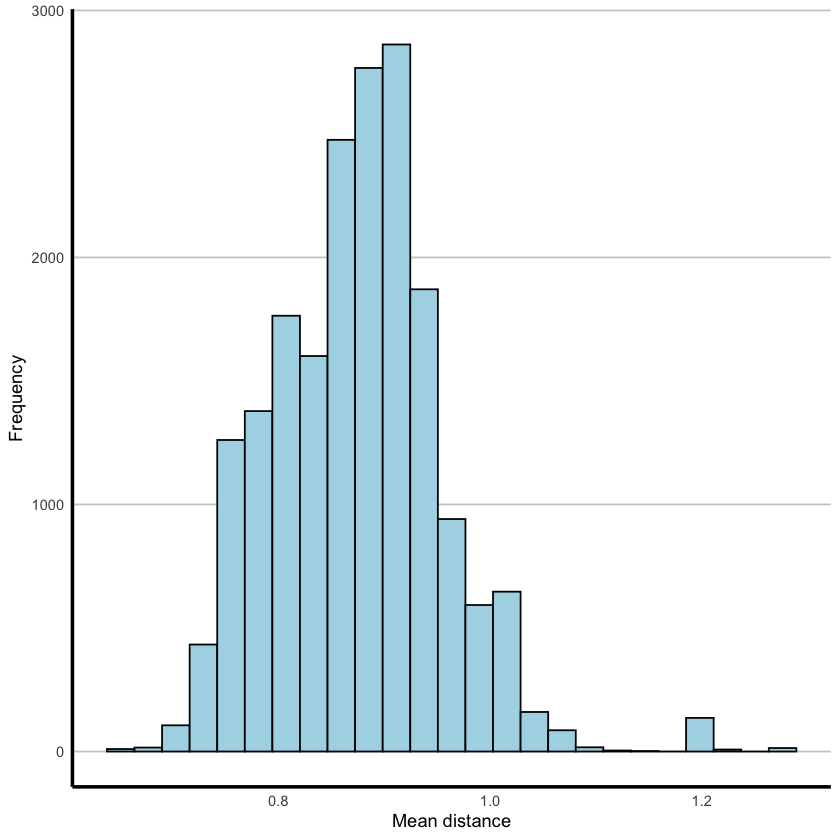

In [19]:
ggplot(
  df,
  aes(x = distances_3)
  ) +
  geom_histogram(
    bins = 25,
    fill = "lightblue",
    color = "black"
  ) +
  labs(
    x = "Mean distance",
    y = "Frequency"
  ) +
  theme_minimal() +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    panel.grid.minor.y = element_blank(),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black")
  )

# Save the plot
ggsave("div_plot_3.png", width = 8, height = 8, dpi = 300)


In [ ]:
# Compute mean Stirling Index per collection date
df_mean <- df %>%
  group_by(collection_date) %>%
  summarize(mean_stirling = mean(diversity_clean, na.rm = TRUE))

# Time series plot with trend line
ggplot(df_mean, aes(x = collection_date, y = mean_stirling)) +
  geom_line(color = "blue", linewidth = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "red", linewidth = 1) +
  labs(
    x = "Collection Date",
    y = expression(k*alpha*" Rao-Stirling"), #nolint
  ) +
  theme_minimal() +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    panel.grid.minor.y = element_blank(),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
  )

# Save the plot
ggsave("div_time_plot_1.png", width = 8, height = 5, dpi = 300)


In [ ]:
# Time series plot of stirling_index vs collection_date
df_mean <- df %>%
  group_by(collection_date) %>%
  summarize(mean_stirling = mean(diversity_clean_2))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_stirling
  )
  ) +
  geom_line(color = "blue", linewidth = 0.5) +  # Original time series
  geom_smooth(method = "lm", se = FALSE, color = "red", linewidth = 1) +
  labs(
    x = "Collection Date",
    y = expression(k*beta*" Rao-Stirling"), #nolint
  ) +
  theme_minimal() +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    panel.grid.minor.y = element_blank(),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
  )

ggsave(
    "div_time_plot_2.png",
    width = 8,
    height = 5,
    dpi = 300
)


#### Editorial type

In [ ]:
# Time series plot of stirling_index vs collection_date
df_mean <- df %>%
  group_by(collection_date, editorial_type) %>%
  summarize(mean_stirling = mean(diversity_clean))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_stirling,
    color = editorial_type
  )
  ) +
  geom_line(linewidth = 0.5) +
  geom_smooth(method = "lm", se = FALSE, linewidth = 1) +
  labs(
    x = "Collection Date",
    y = expression(k*alpha*" Rao-Stirling") #nolint
  ) +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
    legend.position = "bottom"
  )

ggsave(
    "div_1_time_plot.png",
    width = 8,
    height = 5,
    dpi = 300
)


In [ ]:
# Time series plot of stirling_index_2 vs collection_date
df_mean <- df %>%
  group_by(collection_date, editorial_type) %>%
  summarize(mean_stirling = mean(diversity_clean_2))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_stirling,
    color = editorial_type
  )
  ) +
  geom_line(linewidth = 0.5) +
  geom_smooth(method = "lm", se = FALSE, linewidth = 1) +
  labs(
    x = "Collection Date",
    y = expression(k*beta*" Rao-Stirling") #nolint
  ) +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
    legend.position = "bottom"
  )

ggsave(
    "div_2_time_plot.png",
    width = 8,
    height = 5,
    dpi = 300
)


In [ ]:
# Time series plot of distance_index vs collection_date
df_mean <- df %>%
  group_by(collection_date, editorial_type) %>%
  summarize(mean_distances = mean(distances_3))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_distances,
    color = editorial_type
  )
  ) +
  geom_line(linewidth = 0.5) +
  geom_smooth(method = "lm", se = FALSE, linewidth = 1) +
  labs(
    x = "Collection Date",
    y = "Mean distance"
  ) +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
    legend.position = "bottom"
  )

ggsave(
    "div_3_time_plot.png",
    width = 8,
    height = 5,
    dpi = 300
)


#### Curator

In [ ]:
# Time series plot of stirling_index vs collection_date
df_mean <- df %>%
  group_by(collection_date, playlist_type) %>%
  summarize(mean_stirling = mean(diversity_clean))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_stirling,
    color = playlist_type
  )
  ) +
  geom_line() +
  #geom_point() +
  labs(
    x = "Collection Date",
    y = expression(k*alpha*" Rao-Stirling") #nolint
  ) +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
    legend.position = "bottom"
  )

ggsave(
    "div_1_time_plot.png",
    width = 8,
    height = 5,
    dpi = 300
)


In [ ]:
# Time series plot of stirling_index_2 vs collection_date
df_mean <- df %>%
  group_by(collection_date, playlist_type) %>%
  summarize(mean_stirling = mean(diversity_clean_2))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_stirling,
    color = playlist_type
  )
  ) +
  geom_line() +
  #geom_point() +
  labs(
    x = "Collection Date",
    y = expression(k*beta*" Rao-Stirling") #nolint
  ) +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
    legend.position = "bottom"
  )

ggsave(
    "div_2_time_plot.png",
    width = 8,
    height = 5,
    dpi = 300
)


In [ ]:
# Time series plot of dist_index vs collection_date
df_mean <- df %>%
  group_by(collection_date, playlist_type) %>%
  summarize(mean_distances = mean(distances_3))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_distances,
    color = playlist_type
  )
  ) +
  geom_line() +
  #geom_point() +
  labs(
    x = "Collection Date",
    y = "Mean distance"
  ) +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
    legend.position = "bottom"
  )

ggsave(
    "div_3_time_plot.png",
    width = 8,
    height = 5,
    dpi = 300
)


## Models

### FE static

In [20]:
# k alpha Rao-Stirling
model_1 <- feols(
    diversity_norm ~ editorial_type,
    data = df,
    cluster = c("editorial_type")
)
summary(model_1)

model_2 <- feols(
    diversity_norm ~ editorial_type + nb_tracks + playlist_date +
    followers_class |
    collection_date,
    data = df,
    cluster = c("editorial_type")
)
summary(model_2)


OLS estimation, Dep. Var.: diversity_norm
Observations: 19,153 
Standard-errors: Clustered (editorial_type) 
                     Estimate          Std. Error         t value  Pr(>|t|)    
(Intercept)          0.020383 0.00000000000000166  12263374215396 < 2.2e-16 ***
editorial_typemood  -0.178906 0.00000000000000419 -42699890190862 < 2.2e-16 ***
editorial_typetrend  0.524387 0.00000000000000252 208333734288961 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.978479   Adj. R2: 0.042433

OLS estimation, Dep. Var.: diversity_norm
Observations: 19,153 
Fixed-effects: collection_date: 157
Standard-errors: Clustered (editorial_type) 
                         Estimate Std. Error  t value  Pr(>|t|)    
editorial_typemood      -0.224060   0.042471 -5.27556 0.0341031 *  
editorial_typetrend      0.427075   0.036930 11.56443 0.0073946 ** 
nb_tracks               -0.005899   0.003172 -1.85984 0.2039894    
playlist_datebackline    0.185623   0.169210  1.09700 0.3870846    
followers_classlow       0.234847   0.191341  1.22737 0.3445455    
followers_classmid_high  0.257693   0.038029  6.77617 0.0210921 *  
followers_classmid_low   0.465835   0.282870  1.64682 0.2413481    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.942284     Adj. R2: 0.104436
                 Within R2: 0.108759

In [21]:
# k beta Rao-Stirling
model_1 <- feols(
    diversity_norm_2 ~ editorial_type,
    data = df,
    cluster = c("editorial_type")
)
summary(model_1)

model_2 <- feols(
    diversity_norm_2 ~ editorial_type + nb_tracks + playlist_date +
    followers_class |
    collection_date,
    data = df,
    cluster = c("editorial_type")
)
summary(model_2)


OLS estimation, Dep. Var.: diversity_norm_2
Observations: 19,153 
Standard-errors: Clustered (editorial_type) 
                     Estimate          Std. Error         t value  Pr(>|t|)    
(Intercept)          0.082546 0.00000000000000405  20382809901272 < 2.2e-16 ***
editorial_typemood  -0.364429 0.00000000000000732 -49802578796833 < 2.2e-16 ***
editorial_typetrend  0.683186 0.00000000000000544 125474161615565 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.948894   Adj. R2: 0.099447

OLS estimation, Dep. Var.: diversity_norm_2
Observations: 19,153 
Fixed-effects: collection_date: 157
Standard-errors: Clustered (editorial_type) 
                         Estimate Std. Error   t value Pr(>|t|)    
editorial_typemood      -0.312421   0.050407 -6.198016 0.025057 *  
editorial_typetrend      0.446381   0.045355  9.842027 0.010166 *  
nb_tracks               -0.011741   0.003541 -3.316039 0.080159 .  
playlist_datebackline    0.129556   0.174820  0.741083 0.535843    
followers_classlow       0.270299   0.161424  1.674468 0.236019    
followers_classmid_high  0.195406   0.103544  1.887184 0.199761    
followers_classmid_low   0.437159   0.313553  1.394208 0.297948    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.828317     Adj. R2: 0.307957
                 Within R2: 0.312268

In [22]:
# Distance index
model <- feols(
    dist_norm_3 ~ editorial_type + nb_tracks + playlist_date +
    followers_class |
    collection_date,
    data = df,
    cluster = c("editorial_type")
)
summary(model)


OLS estimation, Dep. Var.: dist_norm_3
Observations: 19,153 
Fixed-effects: collection_date: 157
Standard-errors: Clustered (editorial_type) 
                         Estimate Std. Error   t value Pr(>|t|)    
editorial_typemood      -0.342169   0.037342 -9.163219 0.011701 *  
editorial_typetrend      0.290179   0.057358  5.059048 0.036921 *  
nb_tracks               -0.015245   0.003987 -3.823279 0.062106 .  
playlist_datebackline    0.131265   0.136161  0.964042 0.436741    
followers_classlow       0.193032   0.170116  1.134705 0.374184    
followers_classmid_high  0.117189   0.127162  0.921575 0.454039    
followers_classmid_low   0.291631   0.379699  0.768059 0.522744    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.716798     Adj. R2: 0.481764
                 Within R2: 0.484736

### Time series

In [16]:
# Create a time index
df$time_index <- as.numeric(df$collection_date - min(df$collection_date))
df$year_month <- format(as.Date(df$collection_date), "%Y-%m")
df$month_index <- as.numeric(as.factor(df$year_month))


In [23]:
# k alpha Rao-Stirling
model_trend <- feols(
  diversity_norm ~ month_index + nb_tracks + playlist_date +
  followers_class * month_index,
  data = df, cluster = c("playlist_id", "collection_date")
  )
summary(model_trend)

# k beta Rao-Stirling
model_trend_2 <- feols(
  diversity_norm_2 ~ month_index + nb_tracks + playlist_date +
  followers_class * month_index,
  data = df, cluster = c("playlist_id", "collection_date")
  )
summary(model_trend_2)

# distance index
model_trend_3 <- feols(
  dist_norm_3 ~ month_index + nb_tracks + playlist_date +
  followers_class * month_index,
  data = df, cluster = c("playlist_id", "collection_date")
  )
summary(model_trend_3)


OLS estimation, Dep. Var.: diversity_norm
Observations: 19,153 
Standard-errors: Clustered (playlist_id & collection_date) 
                                     Estimate Std. Error   t value  Pr(>|t|)
(Intercept)                          0.173345   0.130211  1.331263 0.1856051
month_index                          0.005748   0.002392  2.402996 0.0177803
nb_tracks                           -0.006715   0.002212 -3.035682 0.0029391
playlist_datebackline                0.031621   0.103523  0.305449 0.7605494
followers_classlow                   0.351553   0.166555  2.110733 0.0368540
followers_classmid_high              0.331556   0.140703  2.356417 0.0200589
followers_classmid_low               0.465109   0.205762  2.260428 0.0255823
month_index:followers_classlow      -0.003802   0.004330 -0.878119 0.3816193
month_index:followers_classmid_high -0.006011   0.004218 -1.425193 0.1566758
month_index:followers_classmid_low   0.000994   0.004998  0.198942 0.8426420
                             

OLS estimation, Dep. Var.: diversity_norm_2
Observations: 19,153 
Standard-errors: Clustered (playlist_id & collection_date) 
                                     Estimate Std. Error   t value
(Intercept)                          0.739023   0.129422  5.710174
month_index                          0.005701   0.002256  2.527225
nb_tracks                           -0.012687   0.002448 -5.182501
playlist_datebackline               -0.062965   0.097124 -0.648300
followers_classlow                   0.320147   0.172725  1.853509
followers_classmid_high              0.317532   0.120511  2.634888
followers_classmid_low               0.430841   0.232034  1.856799
month_index:followers_classlow       0.000280   0.004748  0.059041
month_index:followers_classmid_high -0.009394   0.004501 -2.087296
month_index:followers_classmid_low   0.001203   0.004628  0.259999
                                          Pr(>|t|)    
(Intercept)                         0.000000082179 ***
month_index                

OLS estimation, Dep. Var.: dist_norm_3
Observations: 19,153 
Standard-errors: Clustered (playlist_id & collection_date) 
                                     Estimate Std. Error   t value
(Intercept)                          1.121067   0.151269  7.411103
month_index                          0.003932   0.002507  1.568763
nb_tracks                           -0.016024   0.002549 -6.286121
playlist_datebackline               -0.057399   0.102762 -0.558563
followers_classlow                   0.226275   0.176201  1.284191
followers_classmid_high              0.179003   0.147438  1.214090
followers_classmid_low               0.260238   0.239611  1.086086
month_index:followers_classlow       0.000507   0.004412  0.114896
month_index:followers_classmid_high -0.006282   0.004672 -1.344632
month_index:followers_classmid_low   0.002132   0.004742  0.449601
                                             Pr(>|t|)    
(Intercept)                         0.000000000018674 ***
month_index               

In [24]:
# Evolution of Diversity Over Time with Playlist Type Interaction

# k alpha Rao-Stirling
model_trend_1 <- feols(
  diversity_norm ~ month_index * editorial_type +
  nb_tracks + playlist_date + followers_class * month_index,
  data = df, cluster = c("playlist_id", "collection_date")
  )
summary(model_trend_1)

# k beta Rao-Stirling
model_trend_2 <- feols(
  diversity_norm_2 ~ month_index * editorial_type +
  nb_tracks + playlist_date + followers_class * month_index,
  data = df, cluster = c("playlist_id", "collection_date")
  )
summary(model_trend_2)

# k beta Rao-Stirling
model_trend_3 <- feols(
  dist_norm_3 ~ month_index * editorial_type +
  nb_tracks + playlist_date + followers_class * month_index,
  data = df, cluster = c("playlist_id", "collection_date")
  )
summary(model_trend_3)


OLS estimation, Dep. Var.: diversity_norm
Observations: 19,153 
Standard-errors: Clustered (playlist_id & collection_date) 
                                     Estimate Std. Error   t value  Pr(>|t|)
(Intercept)                          0.103661   0.126640  0.818547 0.4146541
month_index                          0.003297   0.002765  1.192662 0.2353354
editorial_typemood                  -0.349377   0.131275 -2.661410 0.0088379
editorial_typetrend                  0.283747   0.295042  0.961716 0.3381102
nb_tracks                           -0.005860   0.001798 -3.259750 0.0014482
playlist_datebackline                0.184502   0.140715  1.311179 0.1922800
followers_classlow                   0.363649   0.150225  2.420700 0.0169764
followers_classmid_high              0.411690   0.142614  2.886739 0.0046116
followers_classmid_low               0.482850   0.182079  2.651874 0.0090770
month_index:editorial_typemood       0.006696   0.003267  2.049837 0.0425413
month_index:editorial_typetre

OLS estimation, Dep. Var.: diversity_norm_2
Observations: 19,153 
Standard-errors: Clustered (playlist_id & collection_date) 
                                     Estimate Std. Error   t value
(Intercept)                          0.603999   0.124210  4.862725
month_index                          0.006661   0.002888  2.306376
editorial_typemood                  -0.335475   0.125675 -2.669385
editorial_typetrend                  0.526901   0.328451  1.604199
nb_tracks                           -0.011718   0.002044 -5.732700
playlist_datebackline                0.132948   0.131725  1.009281
followers_classlow                   0.323315   0.153380  2.107928
followers_classmid_high              0.400965   0.127817  3.137015
followers_classmid_low               0.447079   0.202725  2.205341
month_index:editorial_typemood       0.001116   0.003582  0.311681
month_index:editorial_typetrend     -0.004406   0.004823 -0.913403
month_index:followers_classlow      -0.002630   0.004942 -0.532186
mon

OLS estimation, Dep. Var.: dist_norm_3
Observations: 19,153 
Standard-errors: Clustered (playlist_id & collection_date) 
                                     Estimate Std. Error   t value
(Intercept)                          1.036821   0.152381  6.804138
month_index                          0.004415   0.002971  1.485991
editorial_typemood                  -0.371807   0.139803 -2.659502
editorial_typetrend                  0.305337   0.282281  1.081679
nb_tracks                           -0.015240   0.002301 -6.624388
playlist_datebackline                0.131041   0.134067  0.977434
followers_classlow                   0.237221   0.160451  1.478462
followers_classmid_high              0.269878   0.152722  1.767118
followers_classmid_low               0.288333   0.218870  1.317373
month_index:editorial_typemood       0.001561   0.003478  0.448732
month_index:editorial_typetrend     -0.000866   0.003037 -0.285213
month_index:followers_classlow      -0.002120   0.004712 -0.449977
month_in

In [35]:
# Quadratic model
# Model: Evolution of Diversity Over Time with Playlist Type Interaction
model_trend <- feols(
  diversity_norm ~ month_index^2 +
  nb_tracks + playlist_date + followers_class * month_index,
  data = df, cluster = c("playlist_id", "collection_date")
  )
summary(model_trend)


OLS estimation, Dep. Var.: diversity_norm
Observations: 19,153 
Standard-errors: Clustered (playlist_id & collection_date) 
                                     Estimate Std. Error   t value  Pr(>|t|)
(Intercept)                          0.163945   0.131520  1.246538 0.2149749
I(month_index^2)                    -0.000038   0.000143 -0.268439 0.7888188
nb_tracks                           -0.006718   0.002214 -3.034747 0.0029476
playlist_datebackline                0.031457   0.103473  0.304014 0.7616391
followers_classlow                   0.352938   0.167108  2.112043 0.0367392
followers_classmid_high              0.332350   0.140835  2.359861 0.0198820
followers_classmid_low               0.465896   0.206004  2.261587 0.0255084
month_index                          0.007198   0.005979  1.203778 0.2310249
followers_classlow:month_index      -0.003855   0.004336 -0.889117 0.3757046
followers_classmid_high:month_index -0.006035   0.004222 -1.429539 0.1554263
followers_classmid_low:month_

### Secondary models

#### Playlist curator

In [14]:
model_1 <- feols(
    diversity_norm ~ i(curator, editorial_type) + nb_tracks +
    playlist_date + followers_class | collection_date,
    data = df, cluster = c("editorial_type")
)
summary(model_1)

model_2 <- feols(
    diversity_norm_2 ~ i(curator, editorial_type) + nb_tracks +
    playlist_date + followers_class | collection_date,
    data = df, cluster = c("editorial_type")
)
summary(model_2)


OLS estimation, Dep. Var.: diversity_norm
Observations: 19,153 
Fixed-effects: collection_date: 157
Standard-errors: Clustered (editorial_type) 
                                            Estimate Std. Error  t value
curator::Editorial:editorial_type::mood    -0.190526   0.040072 -4.75464
curator::Editorial:editorial_type::trend    0.205803   0.047132  4.36657
curator::Major label:editorial_type::genre -0.547466   0.219018 -2.49964
curator::Major label:editorial_type::mood  -0.812990   0.206233 -3.94210
curator::Major label:editorial_type::trend  0.245702   0.123385  1.99134
nb_tracks                                  -0.003771   0.003317 -1.13686
playlist_datebackline                       0.189746   0.160826  1.17982
followers_classlow                          0.632320   0.227737  2.77654
followers_classmid_high                     0.307384   0.065149  4.71820
followers_classmid_low                      0.805623   0.104446  7.71327
                                           Pr(>|t|) 

OLS estimation, Dep. Var.: diversity_norm_2
Observations: 19,153 
Fixed-effects: collection_date: 157
Standard-errors: Clustered (editorial_type) 
                                            Estimate Std. Error   t value
curator::Editorial:editorial_type::mood    -0.286010   0.053970 -5.299441
curator::Editorial:editorial_type::trend    0.173102   0.049001  3.532582
curator::Major label:editorial_type::genre -0.483375   0.186322 -2.594303
curator::Major label:editorial_type::mood  -0.825334   0.172466 -4.785480
curator::Major label:editorial_type::trend  0.354958   0.051602  6.878740
nb_tracks                                  -0.009789   0.003701 -2.645281
playlist_datebackline                       0.129525   0.161424  0.802388
followers_classlow                          0.597248   0.135436  4.409815
followers_classmid_high                     0.232263   0.127661  1.819370
followers_classmid_low                      0.715970   0.126475  5.660983
                                       

In [19]:
# Extract numeric values
df_combined$diversity_clean <- as.numeric(
    gsub("[^[:digit:].-]", "", df_combined$stirling_index)
)
df_combined$diversity_clean_2 <- as.numeric(
    gsub("[^[:digit:].-]", "", df_combined$stirling_index_2)
)

# Scale values
df_combined$diversity_norm <- rescale(diversity_clean, df_combined, kind = "z")
df_combined$diversity_norm_2 <- rescale(
    diversity_clean_2, df_combined, kind = "z"
)

# Log values
df_combined$diversity_log <- log(df_combined$diversity_clean + 1)
df_combined$diversity_log_2 <- log(df_combined$diversity_clean_2 + 1)

# Log Followers
df_combined$log_followers <- log(df_combined$playlist_followers)

# Followers class
summary(df_combined$playlist_followers)
df_combined$followers_class <- case_when(
    df_combined$playlist_followers <= 25463 ~ "low",
    df_combined$playlist_followers > 25463 &
    df_combined$playlist_followers <= 98114 ~ "mid_low",
    df_combined$playlist_followers > 98114 &
    df_combined$playlist_followers <= 267642 ~ "mid_high",
    df_combined$playlist_followers > 267642 ~ "high"
)
table(df_combined$followers_class)

# Playlist dates
df_combined <- df_combined %>%
    mutate(
        collection_date = as.Date(collection_date),
        mean_track_date = as.Date(mean_track_date)
    ) %>%
    mutate(
        playlist_date = case_when(
            mean_track_date > collection_date - dyears(1.5) ~ "frontline",
            TRUE ~ "backline"
        )
    )

# Relevel factors
df_combined$curator <- relevel(
    as.factor(df_combined$playlist_type), ref = "Charts"
)
table(df_combined$curator)

df_combined$playlist_date <- relevel(
    as.factor(df_combined$playlist_date), ref = "frontline"
)
table(df_combined$playlist_date)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    118   25463   98114  216607  267642 2300846 


    high      low mid_high  mid_low 
    4867     4867     4866     4867 


     Charts   Editorial Major label 
        314        9576        9577 


frontline  backline 
     6934     12533 

In [20]:
model_1 <- feols(
    diversity_norm ~ curator + nb_tracks +
    playlist_date + followers_class | collection_date,
    data = df_combined, cluster = c("curator")
)
summary(model_1)

model_2 <- feols(
    diversity_norm_2 ~ curator + nb_tracks +
    playlist_date + followers_class | collection_date,
    data = df_combined, cluster = c("curator")
)
summary(model_2)


OLS estimation, Dep. Var.: diversity_norm
Observations: 19,467 
Fixed-effects: collection_date: 157
Standard-errors: Clustered (curator) 
                         Estimate Std. Error    t value  Pr(>|t|)    
curatorEditorial         0.228580   0.011695  19.544350 0.0026077 ** 
curatorMajor label      -0.055879   0.062940  -0.887804 0.4683139    
nb_tracks               -0.005921   0.000196 -30.227268 0.0010927 ** 
playlist_datebackline    0.033005   0.099715   0.330995 0.7721097    
followers_classlow       0.523766   0.040780  12.843828 0.0060074 ** 
followers_classmid_high  0.263281   0.028403   9.269577 0.0114387 *  
followers_classmid_low   0.684341   0.056623  12.086012 0.0067764 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.956257     Adj. R2: 0.077822
                 Within R2: 0.082281

OLS estimation, Dep. Var.: diversity_norm_2
Observations: 19,467 
Fixed-effects: collection_date: 157
Standard-errors: Clustered (curator) 
                         Estimate Std. Error    t value  Pr(>|t|)    
curatorEditorial         0.031847   0.005659   5.627813 0.0301526 *  
curatorMajor label      -0.172120   0.124036  -1.387668 0.2996239    
nb_tracks               -0.012180   0.000452 -26.949724 0.0013740 ** 
playlist_datebackline   -0.061069   0.142461  -0.428670 0.7099179    
followers_classlow       0.502642   0.071557   7.024343 0.0196709 *  
followers_classmid_high  0.178477   0.016370  10.902525 0.0083082 ** 
followers_classmid_low   0.605874   0.085431   7.091970 0.0193083 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.852179     Adj. R2: 0.267614
                 Within R2: 0.272158

In [31]:
# Create a time index
df_combined$time_index <- as.numeric(
  df_combined$collection_date - min(df_combined$collection_date)
)
df_combined$year_month <- format(as.Date(df_combined$collection_date), "%Y-%m")
df_combined$month_index <- as.numeric(as.factor(df_combined$year_month))

# k alpha Rao-Stirling
model_trend <- feols(
  diversity_norm ~ month_index * curator +
  nb_tracks + playlist_date + followers_class * month_index,
  data = df_combined, cluster = c("playlist_id", "collection_date")
  )
summary(model_trend)

# k beta Rao-Stirling
model_trend <- feols(
  diversity_norm_2 ~ month_index * curator +
  nb_tracks + playlist_date + followers_class * month_index,
  data = df_combined, cluster = c("playlist_id", "collection_date")
  )
summary(model_trend)


OLS estimation, Dep. Var.: diversity_norm
Observations: 19,467 
Standard-errors: Clustered (playlist_id & collection_date) 
                                     Estimate Std. Error   t value   Pr(>|t|)
(Intercept)                          0.076291   0.146815  0.519640 0.60424846
month_index                         -0.004243   0.005152 -0.823442 0.41185018
curatorEditorial                     0.023804   0.103774  0.229378 0.81895600
curatorMajor label                  -0.138280   0.294190 -0.470037 0.63916115
nb_tracks                           -0.005876   0.002695 -2.180605 0.03111580
playlist_datebackline                0.032948   0.100848  0.326710 0.74444223
followers_classlow                   0.503439   0.254228  1.980267 0.04990565
followers_classmid_high              0.377796   0.139904  2.700393 0.00790204
followers_classmid_low               0.570963   0.147147  3.880221 0.00016911
month_index:curatorEditorial         0.011198   0.005397  2.074784 0.04009174
month_index:curato

OLS estimation, Dep. Var.: diversity_norm_2
Observations: 19,467 
Standard-errors: Clustered (playlist_id & collection_date) 
                                     Estimate Std. Error   t value
(Intercept)                          0.881480   0.170613  5.166553
month_index                         -0.006032   0.004942 -1.220728
curatorEditorial                    -0.199189   0.125848 -1.582776
curatorMajor label                  -0.325156   0.336330 -0.966778
nb_tracks                           -0.012160   0.002993 -4.062780
playlist_datebackline               -0.058656   0.094651 -0.619705
followers_classlow                   0.437118   0.310627  1.407213
followers_classmid_high              0.346331   0.118829  2.914525
followers_classmid_low               0.525614   0.203809  2.578954
month_index:curatorEditorial         0.012392   0.005213  2.376902
month_index:curatorMajor label       0.008261   0.006731  1.227335
month_index:followers_classlow       0.003608   0.009479  0.380628
mon

#### Playlist followers

In [ ]:
# Whole sample
model_trend <- feols(
  log_followers ~ month_index * editorial_type,
  data = df, cluster = c("playlist_id", "collection_date")
  )
summary(model_trend)


In [25]:
# Split the sample by curator
df_major <- df %>%
  filter(curator != "Editorial")
df_spotify <- df %>%
  filter(curator == "Editorial")

model_trend_1 <- feols(
  log_followers ~ month_index * editorial_type,
  data = df_major, cluster = c("playlist_id", "collection_date")
  )
summary(model_trend_1)

model_trend_2 <- feols(
  log_followers ~ month_index * editorial_type,
  data = df_spotify, cluster = c("playlist_id", "collection_date")
  )
summary(model_trend_2)


OLS estimation, Dep. Var.: log_followers
Observations: 9,577 
Standard-errors: Clustered (playlist_id & collection_date) 
                                 Estimate Std. Error   t value  Pr(>|t|)    
(Intercept)                      9.534743   0.347830 27.412111 < 2.2e-16 ***
month_index                      0.023252   0.008953  2.597144  0.011807 *  
editorial_typemood               0.297413   0.421877  0.704975  0.483554    
editorial_typetrend              0.782175   0.463029  1.689257  0.096361 .  
month_index:editorial_typemood  -0.002598   0.010864 -0.239175  0.811785    
month_index:editorial_typetrend -0.019656   0.009099 -2.160345  0.034750 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 1.06854   Adj. R2: 0.056273

OLS estimation, Dep. Var.: log_followers
Observations: 9,576 
Standard-errors: Clustered (playlist_id & collection_date) 
                                 Estimate Std. Error   t value  Pr(>|t|)    
(Intercept)                     12.320218   0.137078 89.877560 < 2.2e-16 ***
month_index                      0.012669   0.000928 13.647959 < 2.2e-16 ***
editorial_typemood              -0.072969   0.185034 -0.394358  0.694715    
editorial_typetrend              0.706827   0.352469  2.005360  0.049441 *  
month_index:editorial_typemood  -0.002004   0.001684 -1.190531  0.238527    
month_index:editorial_typetrend -0.018574   0.010367 -1.791705  0.078223 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.762114   Adj. R2: 0.051425